# **PROYECTO** **FINAL**

## Tarea Semana 3
`GRUPO 3` ⛑ 
1.   Leo Oropin
2.   Christian Morales
3.   José David Morales


In [3]:
# Carga de librerias
import pandas as pd   ## principal módulo para la manipulación y análisis de datos (DataFrames)
import numpy as np   ## módulo de manipulación de matrices y vectores, cálculos numericos
import matplotlib.pyplot as plt ## principal módulo para gráficas
import seaborn as sns   ## otro módulo de gráficas

import plotly.express as px
import plotly.graph_objects as go


# Carga de Datos de Medidor de calidad de Energia ION8650 en CT FRJ1N ⚡

### DATASET

Total: 36,559

Train: 21,932 

Eval: 7,314

Test: 7,314

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Carga de Datos de Medidor de calidad de Energia ION8650 en CT FRJ1N
frj1n_train = pd.read_excel(r"/content/drive/Shareddrives/APPLIED_DATA_SCIENCE/FEATURE_ENGINEERING/ION_FRJ_TRAIN.xlsx")
frj1n_eval = pd.read_excel(r"/content/drive/Shareddrives/APPLIED_DATA_SCIENCE/FEATURE_ENGINEERING/ION_FRJ_EVAL.xlsx")
frj1n_test = pd.read_excel(r"/content/drive/Shareddrives/APPLIED_DATA_SCIENCE/FEATURE_ENGINEERING/ION_FRJ_TEST.xlsx")

In [6]:
columnsDF= ['date','vll_ab','vll_bc', 'vll_ca', 'vll_avg', 'v_unbal', 'i_a', 'i_b', 'i_c', 'i_avg','kw_tot', 'kvar_tot', 'kva_tot', 'freq','Switch']
frj1n_train.columns = columnsDF
frj1n_eval.columns = columnsDF
frj1n_test.columns = columnsDF

In [7]:
# Dimensiones del set de datos FRJ TRAIN
filycol1 = frj1n_train.shape
filycol1

(21934, 15)

In [8]:
# Dimensiones del set de datos FRJ EVAL
filycol2 = frj1n_eval.shape
filycol2

(7312, 15)

In [9]:
# Dimensiones del set de datos FRJ TEST
filycol3 = frj1n_test.shape
filycol3

(7312, 15)

In [10]:
frj1n_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      21934 non-null  datetime64[ns]
 1   vll_ab    21934 non-null  float64       
 2   vll_bc    21934 non-null  float64       
 3   vll_ca    21934 non-null  float64       
 4   vll_avg   21934 non-null  float64       
 5   v_unbal   21934 non-null  float64       
 6   i_a       21934 non-null  float64       
 7   i_b       21934 non-null  float64       
 8   i_c       21934 non-null  float64       
 9   i_avg     21934 non-null  float64       
 10  kw_tot    21934 non-null  float64       
 11  kvar_tot  21934 non-null  float64       
 12  kva_tot   21934 non-null  float64       
 13  freq      21934 non-null  object        
 14  Switch    21934 non-null  int64         
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 2.5+ MB


In [11]:
# Proceso Generador de Datos

#En la acometida principal de los Centros Tecnicos se tiene instalado un medidor de calidad de energia, para el registro de la alimentacion de energia, voltaje en media tension, corriente y potencia consumida.  Asi como otra serie de variables mas especificas de calidad de energia.  Para este caso, se considera un medidor Schneider Electric modelo ION8650B el cual se encuentra instalado en la celda de media tension de CT Fraijanes.

# La extraccion de la informacion del medidor se realiza de forma manual utilizando el software ION Setup v3.1.  Los datos registrados se almacenan en un archivo de excel desde el 17-04-2022 a la 1:00:00 horas.  El dataset contiene mediciones de las variables de energia en periodos de 15 minutos, hasta la fecha promedio de las 3 lineas (sistema trifasico)

# Los datos son del tipo estructurados, y la lectura de cada registro es el promedio registrado en el periodo de 15 minutos de la frecuencia de la medicion.  El medidor de calidad de energia tiene la capacidad de obtener mediciones mas precisas y de otras variables, sin embargo, para nuestra area por el momento unicamente se registra la medicion de las variables de distribucion y no de QoE (quality of energy). 

#     Column         Non-Null Count  Dtype           Description
# ---  ------         --------------  -----          ----------------------------------------
# 0   Date/Time      36558 non-null  datetime64[ns]  Fecha y hora de la medicion  
# 1   Vll ab mean    36558 non-null  float64         Voltaje linea a linea entre fases a y b
# 2   Vll bc mean    36558 non-null  float64         Voltaje linea a linea entre fases b y c
# 3   Vll ca mean    36558 non-null  float64         Voltaje linea a linea entre fases c y a
# 4   Vll avg mean   36558 non-null  float64         Voltaje promedio de las 3 lineas 
# 5   V unbal mean   36558 non-null  float64         Voltaje de desbalance
# 6   I a mean       36558 non-null  float64         Corriente linea a
# 7   I b mean       36558 non-null  float64         Corriente linea b
# 8   I c mean       36558 non-null  float64         Corriente linea c
# 9   I avg mean     36558 non-null  float64         Corriente promedio de las 3 lineas
# 10  kW tot mean    36558 non-null  float64         Potencia Activa total
# 11  kVAR tot mean  36558 non-null  float64         Potencia Reactiva total
# 12  kVA tot mean   36558 non-null  float64         Potencia Aparente total
# 13  Freq mean      36558 non-null  float64         Frecuencia
# 14  SWITCH         36558 non-null  int             Conmutación de enegía comercial a planta de emergencia (variable respuesta)

In [12]:
frj1n_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      21934 non-null  datetime64[ns]
 1   vll_ab    21934 non-null  float64       
 2   vll_bc    21934 non-null  float64       
 3   vll_ca    21934 non-null  float64       
 4   vll_avg   21934 non-null  float64       
 5   v_unbal   21934 non-null  float64       
 6   i_a       21934 non-null  float64       
 7   i_b       21934 non-null  float64       
 8   i_c       21934 non-null  float64       
 9   i_avg     21934 non-null  float64       
 10  kw_tot    21934 non-null  float64       
 11  kvar_tot  21934 non-null  float64       
 12  kva_tot   21934 non-null  float64       
 13  freq      21934 non-null  object        
 14  Switch    21934 non-null  int64         
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 2.5+ MB


In [13]:
# Estadistica descriptiva Dataset FRJ_ION_
frj1n_train.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,Switch
count,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000
mean,13478.407918,13565.181056,13507.990803,13517.193308,0.449150,31.908782,28.725652,28.208035,29.614156,682.422514,121.606897,693.925476,0.009209
std,748.303831,750.145990,746.148508,748.011597,0.389954,4.868469,4.441785,4.327800,4.544402,102.285839,40.850764,105.776069,0.095525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.075649,0.000000,0.000000
25%,13381.613500,13467.936750,13419.276250,13423.909438,0.352654,32.156620,29.077117,28.351676,29.869161,700.520386,134.653236,713.717834,0.000000
50%,13518.754000,13605.872500,13547.094875,13557.070285,0.409755,33.245283,30.051410,29.413403,30.905147,714.659729,140.129554,728.403290,0.000000
75%,13687.074500,13773.215500,13709.916250,13723.547000,0.479797,34.111739,30.771646,30.229497,31.701270,725.280304,143.960571,739.402725,0.000000
max,14753.377000,14798.309570,14727.437500,14759.702000,9.643581,37.106956,33.506409,32.925125,34.483212,769.496826,170.949509,787.571472,1.000000


In [14]:
# convertimos la variable FREQ en FLOAT
frj1n_train["freq"] = pd.to_numeric(frj1n_train["freq"], errors = 'coerce')
frj1n_eval["freq"] = pd.to_numeric(frj1n_eval["freq"], errors = 'coerce')
frj1n_test["freq"] = pd.to_numeric(frj1n_test["freq"], errors = 'coerce')

In [15]:
frj1n_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      21934 non-null  datetime64[ns]
 1   vll_ab    21934 non-null  float64       
 2   vll_bc    21934 non-null  float64       
 3   vll_ca    21934 non-null  float64       
 4   vll_avg   21934 non-null  float64       
 5   v_unbal   21934 non-null  float64       
 6   i_a       21934 non-null  float64       
 7   i_b       21934 non-null  float64       
 8   i_c       21934 non-null  float64       
 9   i_avg     21934 non-null  float64       
 10  kw_tot    21934 non-null  float64       
 11  kvar_tot  21934 non-null  float64       
 12  kva_tot   21934 non-null  float64       
 13  freq      21869 non-null  float64       
 14  Switch    21934 non-null  int64         
dtypes: datetime64[ns](1), float64(13), int64(1)
memory usage: 2.5 MB


In [16]:
# Estadistica descriptiva FRJ
frj1n_train.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,Switch
count,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21869.000000,21934.000000
mean,13478.407918,13565.181056,13507.990803,13517.193308,0.449150,31.908782,28.725652,28.208035,29.614156,682.422514,121.606897,693.925476,60.001063,0.009209
std,748.303831,750.145990,746.148508,748.011597,0.389954,4.868469,4.441785,4.327800,4.544402,102.285839,40.850764,105.776069,0.007379,0.095525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.075649,0.000000,59.878582,0.000000
25%,13381.613500,13467.936750,13419.276250,13423.909438,0.352654,32.156620,29.077117,28.351676,29.869161,700.520386,134.653236,713.717834,59.996948,0.000000
50%,13518.754000,13605.872500,13547.094875,13557.070285,0.409755,33.245283,30.051410,29.413403,30.905147,714.659729,140.129554,728.403290,60.000534,0.000000
75%,13687.074500,13773.215500,13709.916250,13723.547000,0.479797,34.111739,30.771646,30.229497,31.701270,725.280304,143.960571,739.402725,60.004444,0.000000
max,14753.377000,14798.309570,14727.437500,14759.702000,9.643581,37.106956,33.506409,32.925125,34.483212,769.496826,170.949509,787.571472,60.060234,1.000000


# Analisis Exploratorio 🔎

## Graficos de Dispersion

*Aplicamos solo sobre el DATASET DE TRAINING*

<Axes: xlabel='date', ylabel='vll_ca'>

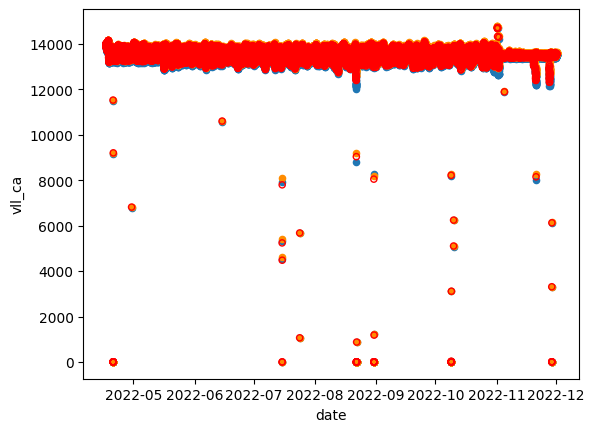

In [17]:
#vll de cada una de las fases en Media Tension
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','vll_ab', ax=ax)
frj1n_train.plot.scatter('date','vll_bc', c='darkorange', ax=ax)
frj1n_train.plot.scatter('date','vll_ca', c='none', edgecolor='red', ax=ax)

<Axes: xlabel='date', ylabel='vll_avg'>

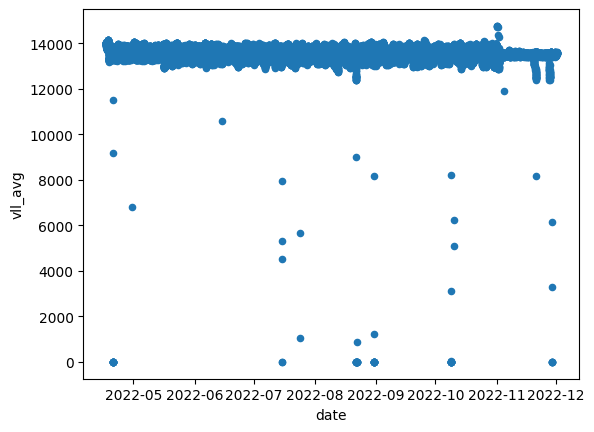

In [18]:
#voltaje linea a linea promedio de las 3 fases
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','vll_avg', ax=ax)

<Axes: xlabel='date', ylabel='i_c'>

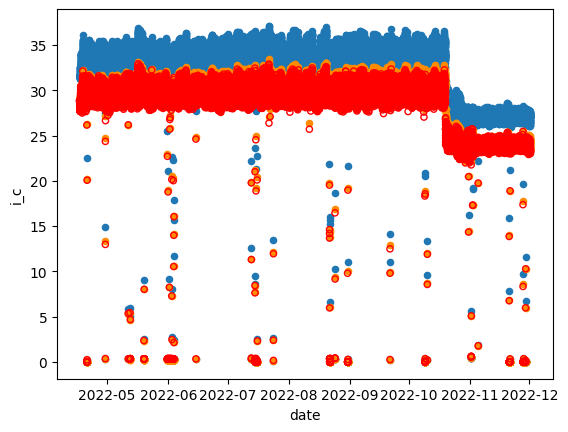

In [19]:
# I promedio de cada una de las fases
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','i_a', ax=ax)
frj1n_train.plot.scatter('date','i_b', c='darkorange', ax=ax)
frj1n_train.plot.scatter('date','i_c', c='none', edgecolor='red', ax=ax)

#se observa un leve desbalance en la carga para la Fase A

<Axes: xlabel='date', ylabel='i_avg'>

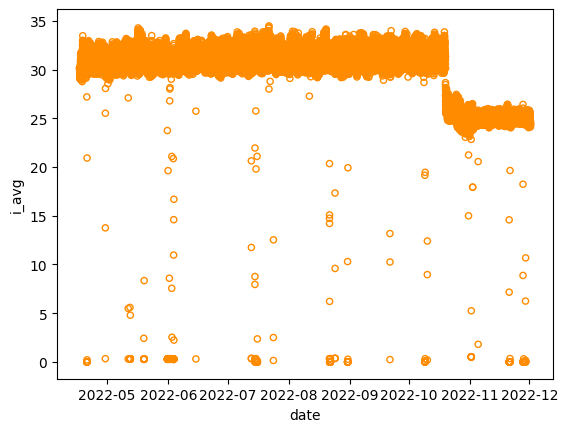

In [20]:
#comportamiento de la corriente de carga promedio en el tiempo
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','i_avg',c='none', edgecolor='darkorange', ax=ax)

In [21]:
# Variables predictoras que consideramos tienen mayor incidencia en la variable respuesta, para las cuales aplicamos cuatro tipos de graficos
# Cajas, Histograma, Violin y Densidad

# vll_avg
# i_avg
# freq
# kw_tot

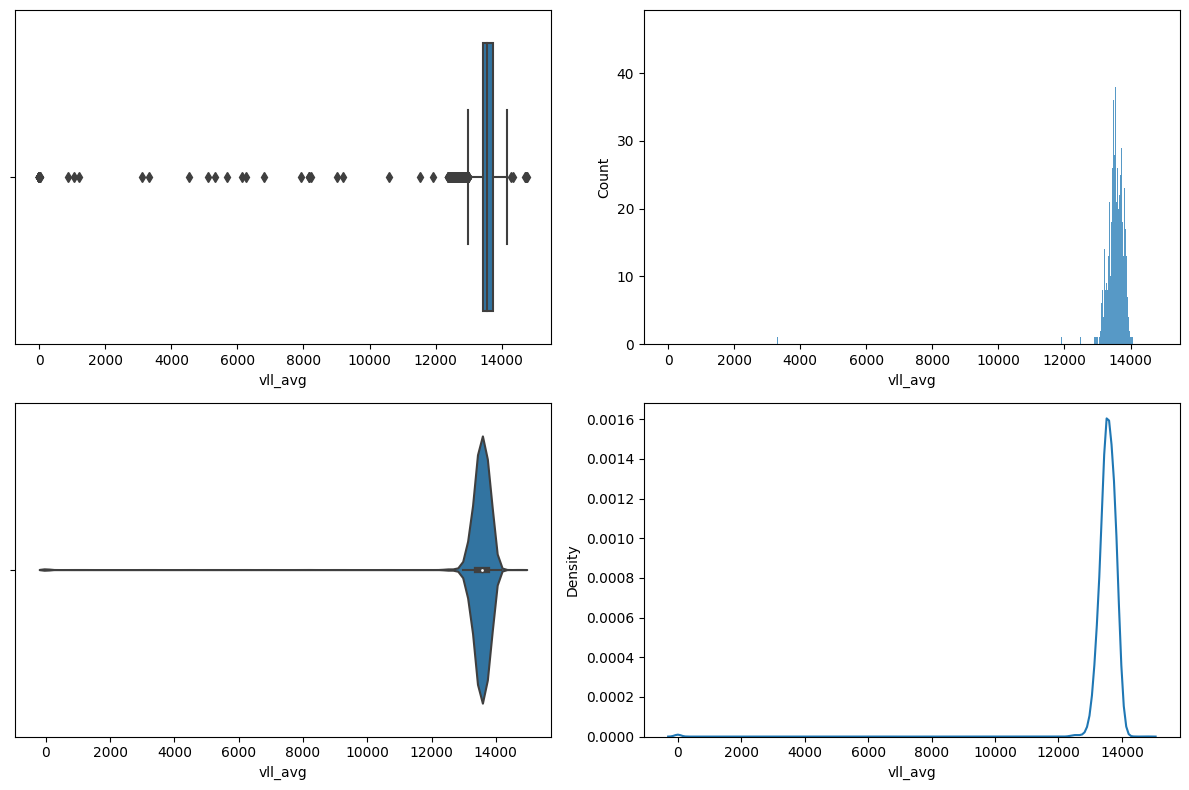

In [22]:
# Voltaje Promedio Linea a Linea (vll_avg)
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='vll_avg', orient='h', ax=axs[0,0])
sns.histplot(data=frj1n_train,x='vll_avg', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='vll_avg', ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='vll_avg', ax=axs[1,1])
plt.tight_layout()

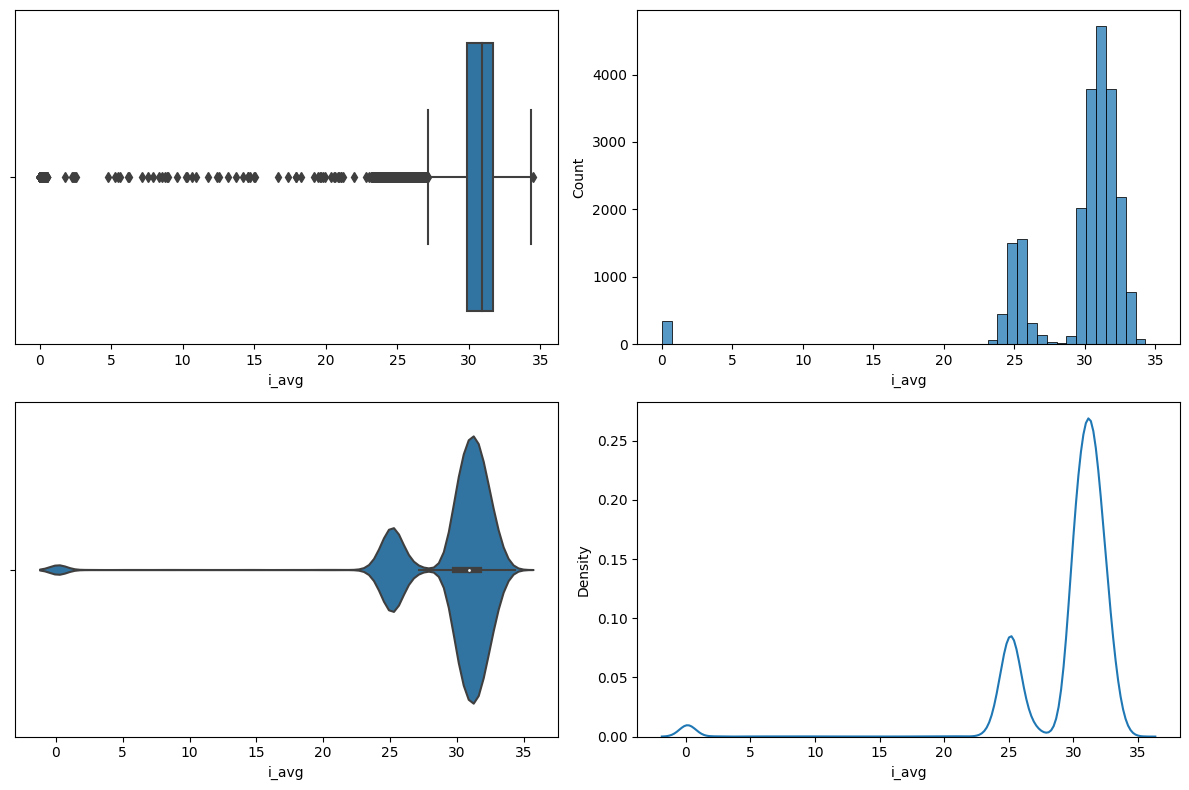

In [23]:
# Corriente Promedio Trifasica (i_avg)
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='i_avg', orient='h', ax=axs[0,0])
sns.histplot(data=frj1n_train,x='i_avg', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='i_avg', ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='i_avg', ax=axs[1,1])
plt.tight_layout()

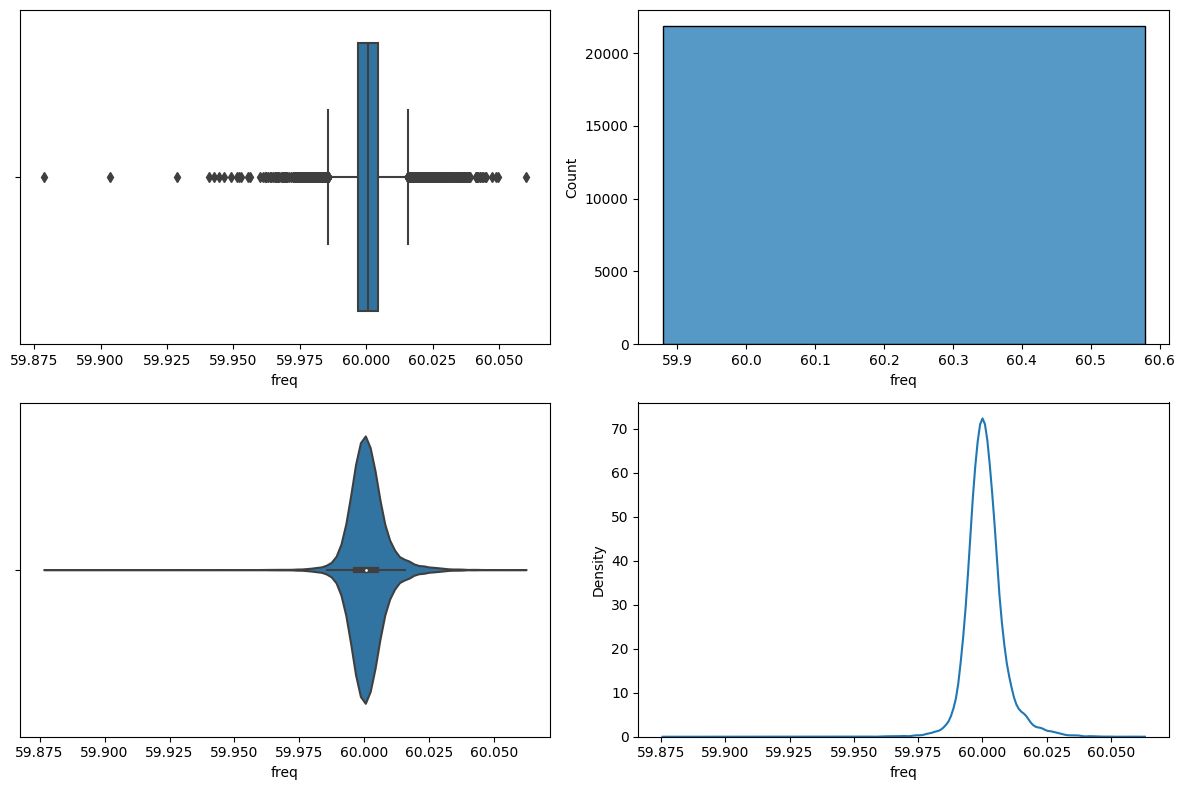

In [24]:
# Frecuencia (para Guatemala 60Hz)
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='freq', orient='h', ax=axs[0,0])
sns.histplot(data=frj1n_train,x='freq', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='freq', ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='freq', ax=axs[1,1])
plt.tight_layout()

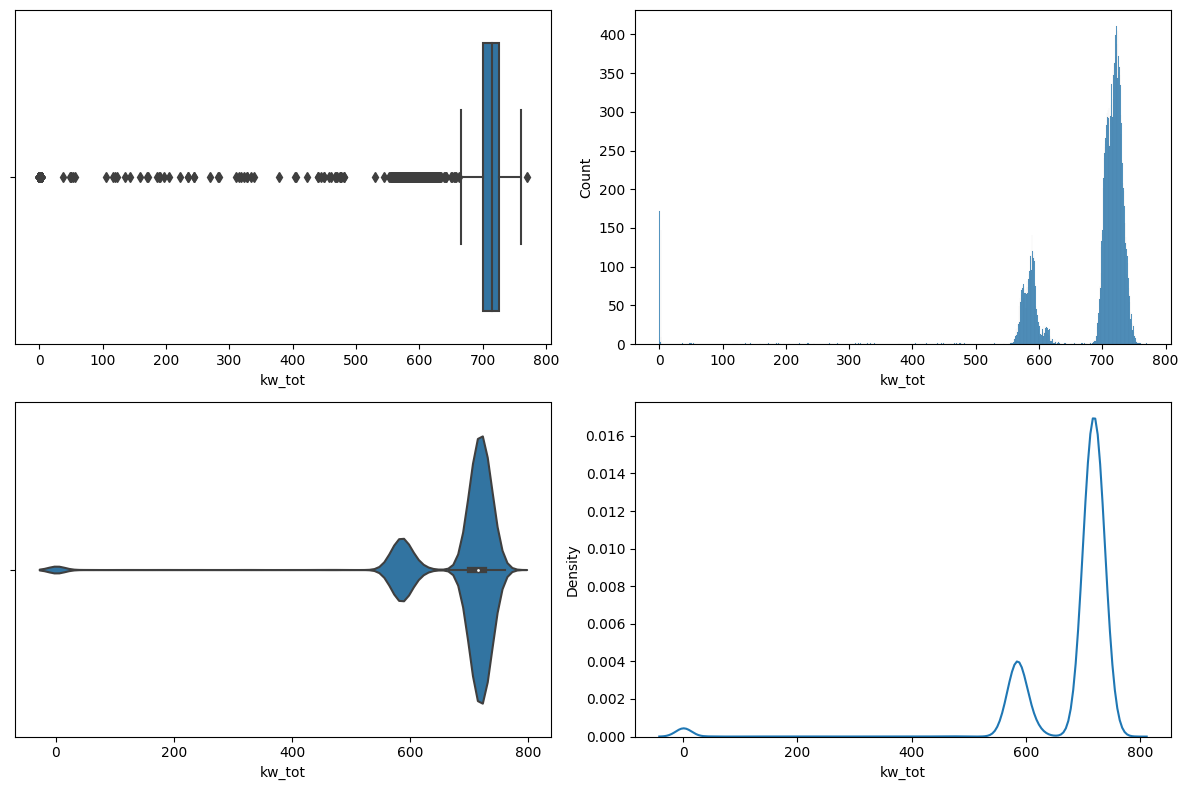

In [25]:
# Potencia Activa Promedio (kw_avg)
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='kw_tot', orient='h', ax=axs[0,0]) #los outliers refieren a cortes de energia
sns.histplot(data=frj1n_train,x='kw_tot', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='kw_tot', ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='kw_tot', ax=axs[1,1])
plt.tight_layout()

### Comportamiento de Variables: Voltaje de Desbalance (v_unbal), frecuencia (freq) para evaluar relacion con variable respuesta

<Axes: xlabel='date', ylabel='v_unbal'>

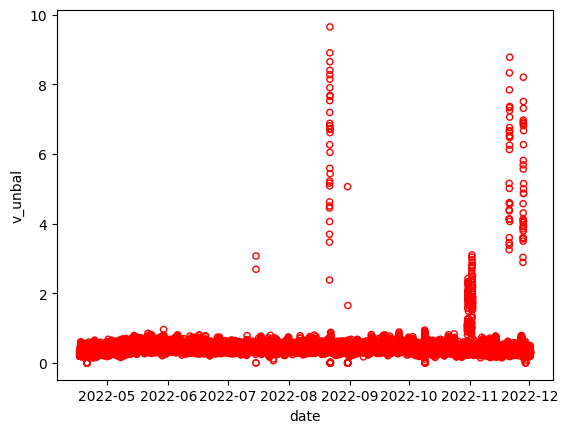

In [26]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','v_unbal',c='none', edgecolor='red', ax=ax)

<Axes: ylabel='Density'>

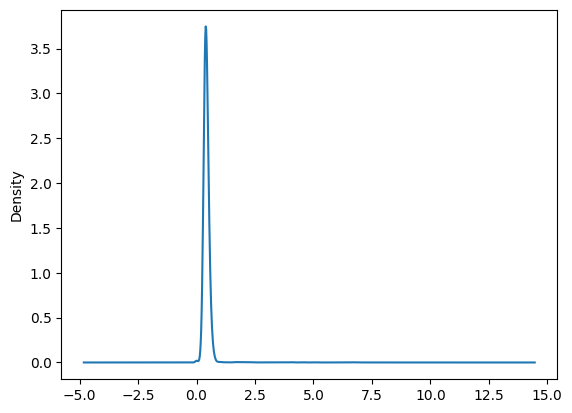

In [27]:
frj1n_train['v_unbal'].plot.kde()

<Axes: xlabel='date', ylabel='freq'>

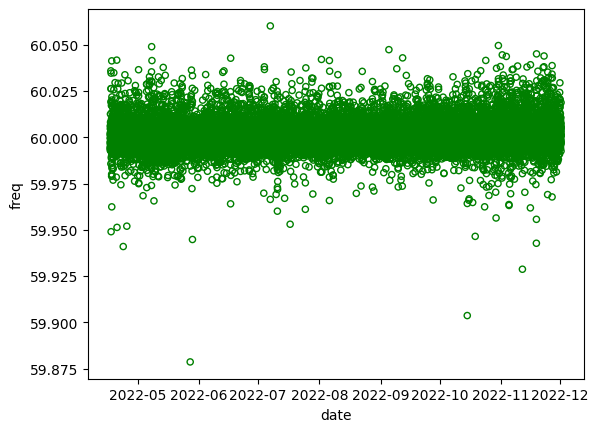

In [28]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','freq',c='none', edgecolor='green', ax=ax)

<Axes: xlabel='kw_tot', ylabel='vll_avg'>

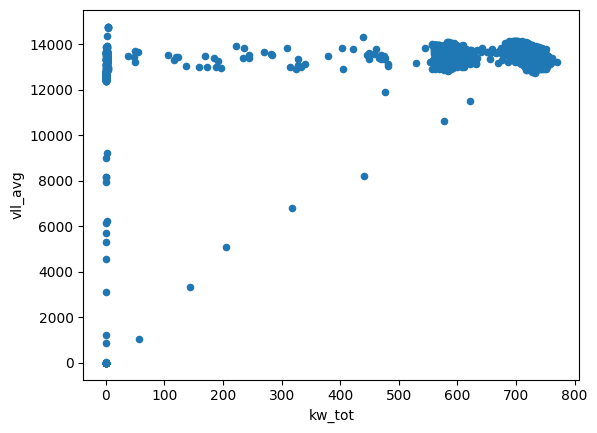

In [29]:
#potencia activa promedio vs voltaje linea-linea promedio
fig, ax = plt.subplots()
frj1n_train.plot.scatter('kw_tot','vll_avg', ax=ax)

<Axes: xlabel='vll_avg', ylabel='i_avg'>

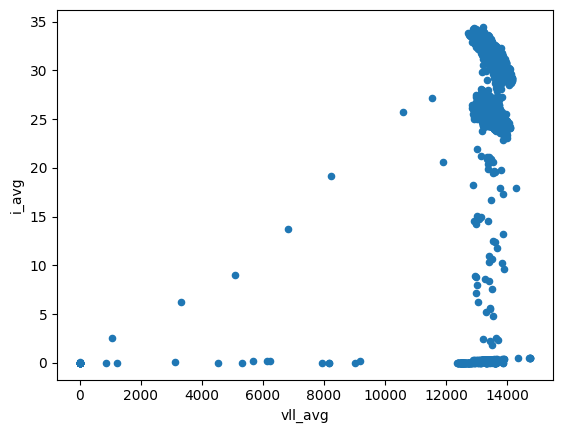

In [30]:
#voltaje linea-linea promedio vs corriente promedio 
fig, ax = plt.subplots()
frj1n_train.plot.scatter('vll_avg','i_avg', ax=ax)

<Axes: xlabel='kw_tot', ylabel='i_avg'>

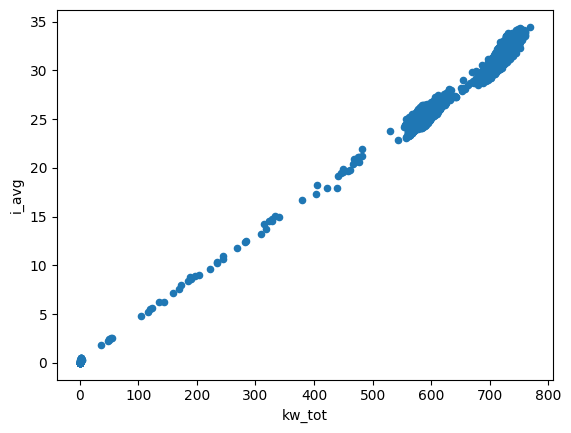

In [31]:
#potencia activa promedio vs corriente promedio - correlacionado
fig, ax = plt.subplots()
frj1n_train.plot.scatter('kw_tot','i_avg', ax=ax)

### Graficos del triangulo de potencias (kW, kVA, kVAR)

<Axes: xlabel='date', ylabel='kw_tot'>

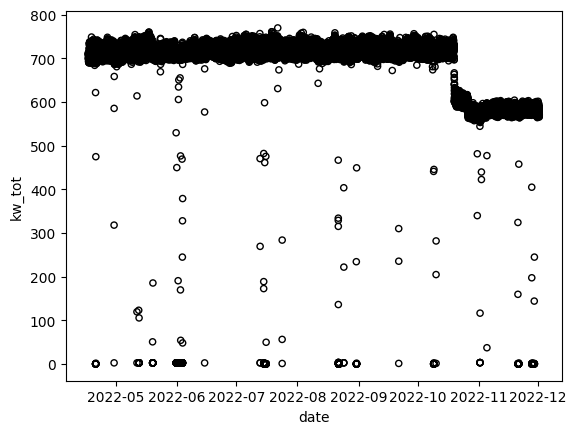

In [32]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','kw_tot',c='none', edgecolor='black', ax=ax)

<Axes: xlabel='date', ylabel='kvar_tot'>

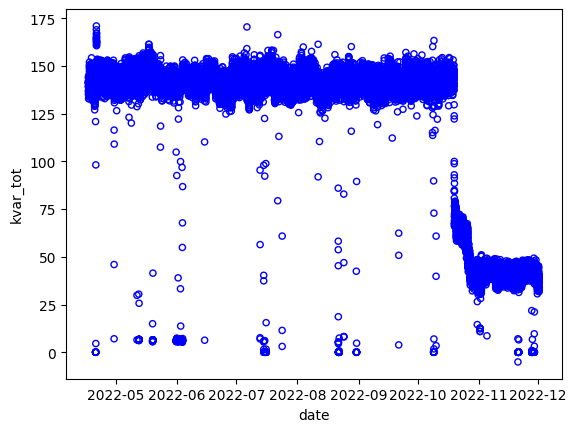

In [33]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','kvar_tot',c='none', edgecolor='blue', ax=ax)

<Axes: xlabel='date', ylabel='kva_tot'>

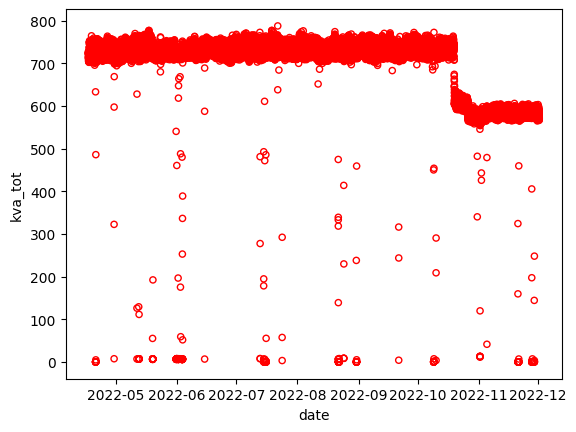

In [34]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','kva_tot',c='none', edgecolor='red', ax=ax)

### Graficos de variables numericas

In [37]:
#para elaborar el siguiente grafico se eliminaron las 2 variables que no son numericas
df = pd.DataFrame(data=frj1n_train)
del df['date']
del df['Switch']

In [38]:
frj1n_train

,date,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,Switch
0,2022-12-01 12:15:00,13549.370,13617.111,13562.88700,13576.46000,0.274549,26.343248,23.478584,23.260210,24.360676,570.390991,36.298122,571.601379,60.005852,0
1,2022-12-01 12:00:00,13536.819,13605.025,13551.66700,13564.50800,0.289523,26.191860,23.433203,23.140800,24.255283,567.616028,33.953884,568.672791,60.001492,0
2,2022-12-01 11:45:00,13525.006,13588.523,13539.64400,13551.05200,0.297547,26.440498,23.728947,23.377136,24.515530,572.969543,38.122196,574.250305,60.018795,0
3,2022-12-01 11:30:00,13517.328,13586.898,13539.01900,13547.75900,0.328185,26.215769,23.377346,23.132750,24.241957,566.645996,32.522152,567.614502,60.007656,0
4,2022-12-01 11:15:00,13527.545,13599.054,13550.37300,13558.99100,0.325932,26.574001,23.642118,23.445925,24.554014,574.125000,37.638298,575.376038,59.992561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21929,2022-04-17 02:00:00,13794.535,13866.513,13842.20000,13834.40800,0.243253,32.482582,29.274456,28.863388,30.206839,708.708008,139.237228,722.371399,60.001320,0
21930,2022-04-17 01:45:00,13868.192,13957.829,13915.89800,13913.97100,0.265036,32.559765,29.345390,28.857056,30.254066,713.095947,144.368851,727.587830,59.993851,0
21931,2022-04-17 01:30:00,13858.353,13957.397,13916.41400,13910.70900,0.328898,32.471920,29.166483,28.850023,30.162807,711.119751,141.916824,725.203430,59.997093,0
21932,2022-04-17 01:15:00,13815.879,13915.195,13881.89600,13870.99400,0.348926,32.330872,29.136560,28.907778,30.125074,708.361816,140.894333,722.348267,60.006119,0


array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

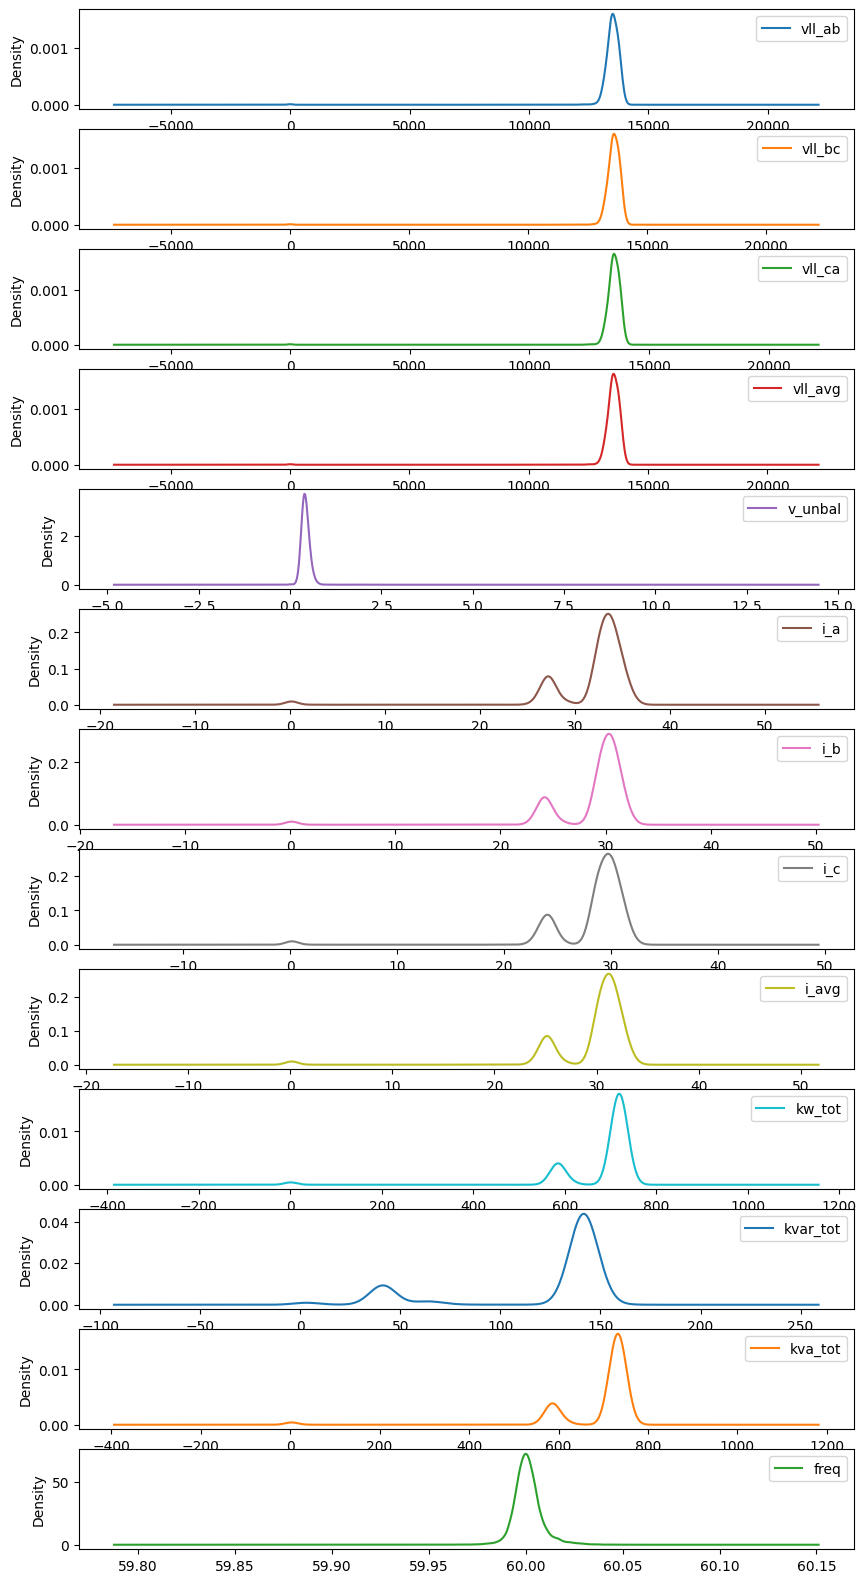

In [39]:
df.plot.kde(subplots=True, figsize=(10,20), sharex=False)

# Los Aires Acondicionados representan un aporte significativo en la demanda de potencia reactiva 
# ya que fueron los que se sacaron hacia el plan de contingencia

<Axes: xlabel='Switch', ylabel='count'>

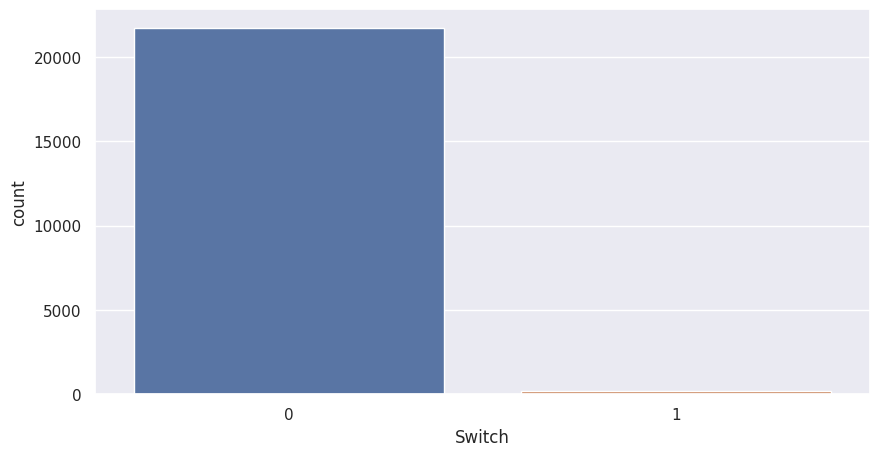

In [40]:
#grafico de barras de la variable respuesta
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n_train,x='Switch')

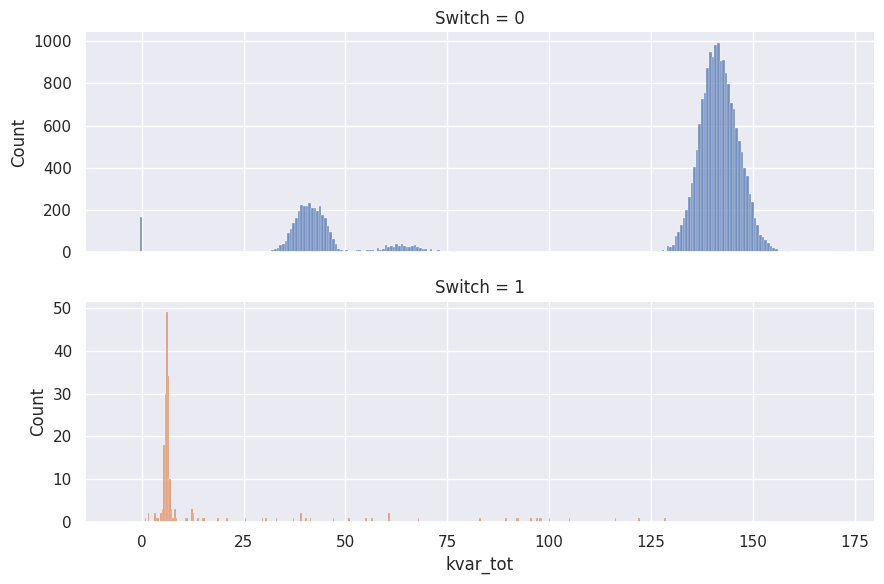

In [41]:
g = sns.FacetGrid(frj1n_train, sharey=False, row='Switch',  hue='Switch',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='kvar_tot')#, log_scale=True, binwidth=0.03)

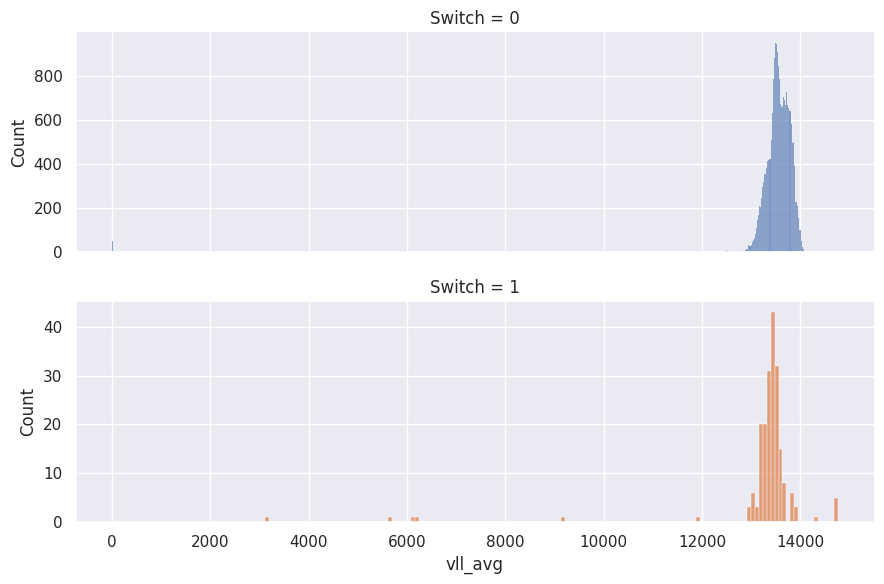

In [42]:
g = sns.FacetGrid(frj1n_train, sharey=False, row='Switch',  hue='Switch',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='vll_avg')#, log_scale=True, binwidth=0.03)

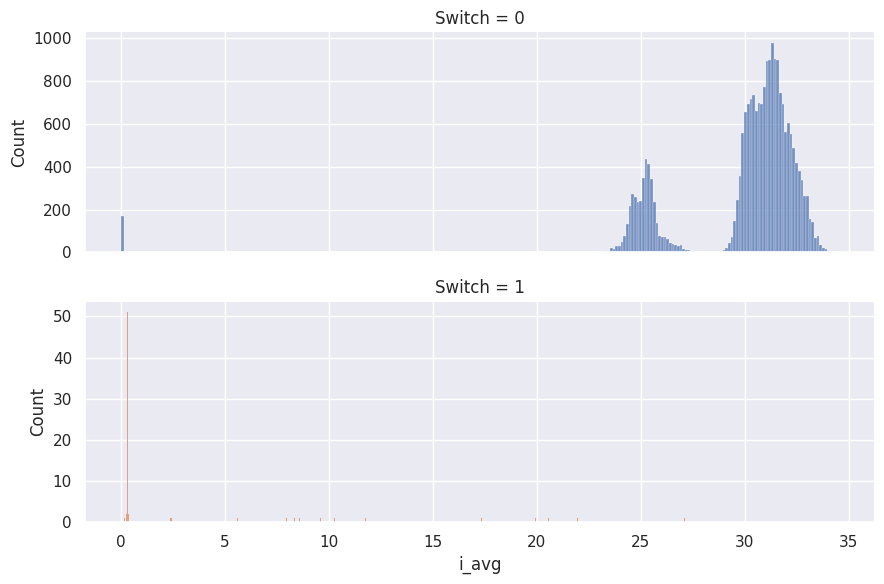

In [43]:

g = sns.FacetGrid(frj1n_train, sharey=False, row='Switch',  hue='Switch',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='i_avg')#, log_scale=True, binwidth=0.03)

In [44]:
# variable 'kw_tot' por día
hora = frj1n_train.groupby(pd.Grouper(key='date', axis=0, 
                      freq='D')).median()

<Axes: xlabel='kw_tot', ylabel='Count'>

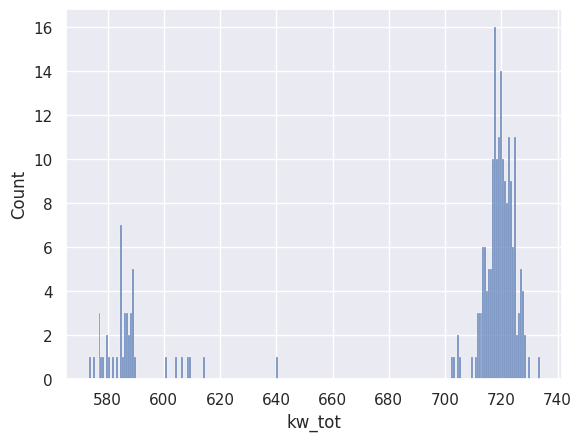

In [45]:
#Grafico Histograma
sns.histplot(data=hora,x='kw_tot', binwidth=0.7)

# Distribucion Bimodal, lo que se explica por la disminucion de la carga por la implementacion de la contingencia en la 
# subestacion.

### Analisis Actual del Set de Datos (Referencia)

> Dejamos la refencia de lo que actualmente en nuestra area se trabaja con el dataset, ya que con las herramientas adquiridas en el curso se esta ampliando el alcande de uso.



In [46]:
#Datos agrupados por dia; se toma el valor maximo de cada día para discriminar los cortes de energia durante periodos cortos
#Esto no genera una visualizacion del comportamiento de la potencia en el tiempo.
frj = frj1n_train.groupby(pd.Grouper(key='date', axis=0, 
                      freq='D')).max()

<Axes: xlabel='date'>

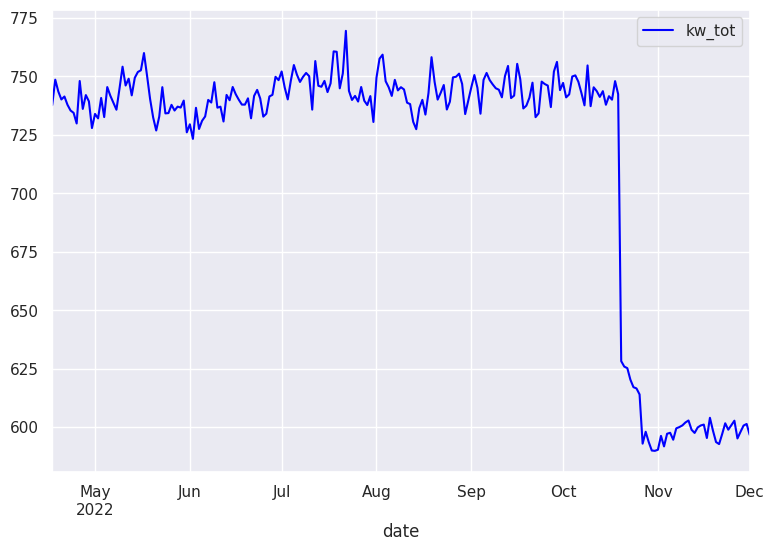

In [47]:
#Grafico de lineas
frj.plot.line(y="kw_tot",
                color = "blue",
                figsize =(9,6))

In [48]:
#import datetime

In [49]:
#fecha = datetime
#print(fecha)

# Creacion de nuevas Features ⚒

## Features Categoricas 

In [50]:
#creacion de variables categoricas de rangos en variables numericas

vnominal = 13600 # voltaje nominal de la red electrica de la EEGSA para el suministro de energia en media tension

frj1n_train['vclasif_ab'] = frj1n_train.vll_ab.map(lambda x : 'Voltaje Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))
frj1n_train['vclasif_bc'] = frj1n_train.vll_bc.map(lambda x : 'Voltaje Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))
frj1n_train['vclasif_ca'] = frj1n_train.vll_ca.map(lambda x : 'Voltaje Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))

#frj1n['vclasif_avg'] = frj1n.vll_avg.map(lambda x : 'Voltaj Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))

In [51]:
frj1n_train['vclasif_ab'].value_counts()

Voltaje Normal    21658
Bajo Voltaje        270
Alto Voltaje          6
Name: vclasif_ab, dtype: int64

In [52]:
frj1n_train['vclasif_bc'].value_counts()

Voltaje Normal    21778
Bajo Voltaje        149
Alto Voltaje          7
Name: vclasif_bc, dtype: int64

In [53]:
frj1n_train['vclasif_ca'].value_counts()

Voltaje Normal    21750
Bajo Voltaje        177
Alto Voltaje          7
Name: vclasif_ca, dtype: int64

In [54]:
#frj1n['vclasif_avg'].value_counts()

In [55]:
sns.set_theme(style="darkgrid")

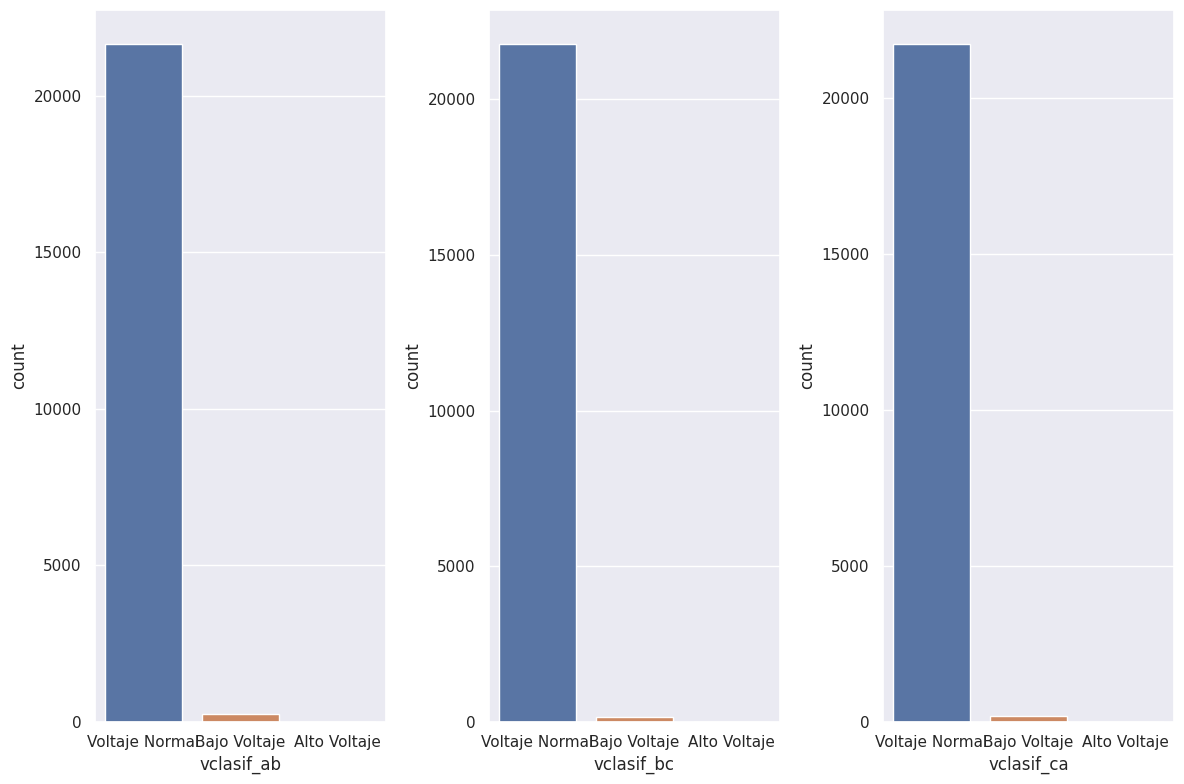

In [56]:
fig, axs = plt.subplots(1,3, figsize=(12,8)) #create grid
sns.countplot(data=frj1n_train,x='vclasif_ab', ax=axs[0])
sns.countplot(data=frj1n_train,x='vclasif_bc', ax=axs[1])
sns.countplot(data=frj1n_train,x='vclasif_ca', ax=axs[2])
plt.tight_layout()

In [57]:
#creacion de nueva feature categorica para visualizar advertencia por potencia reactiva de 150 kVAR (seguridad en la operacion por accionamiento de protecciones)
frj1n_train['kvar_warn']=frj1n_train.kvar_tot.map(lambda x: 'Warning' if x>150 else 'Ok')

In [58]:
frj1n_train['kvar_warn'].value_counts()

Ok         21184
Warning      750
Name: kvar_warn, dtype: int64

<Axes: xlabel='kvar_warn', ylabel='count'>

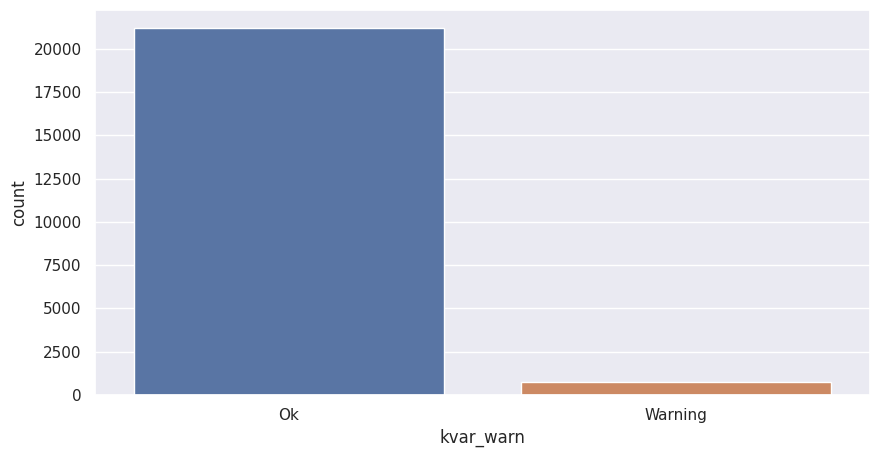

In [59]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n_train,x='kvar_warn')

In [60]:
# De acuerdo al REGLAMENTO DEL MERCADO ELÉCTRICO REGIONAL -RMER- en los citerios de operacion del SISTEMA ELECTRICO 
# REGIONAL - SER- en el inciso 16.2.5 Criterios y Parámetros de Calidad indica para la frecuencia de la red:
# 16.2.5   Criterios y Parámetros de Calidad
# 16.2.5.5 La frecuencia nominal del SER es 60 Hz.
# 16.2.5.6 Durante la operación normal, el 90% de las variaciones de la frecuencia promedio en
#          períodos de 10 minutos, deberán estar comprendidas dentro del rango de (60 ± 1.65 σ) Hz,
#          donde σ es la desviación estándar de la frecuencia promedio en períodos de 10 minutos. El
#          valor de σ será de 0.03 Hz.

# creacion de nueva feature indicando riesgo de operacion por frecuencia fuera de 
# parametros de operacion: 60hz+/- 1.65 * (0.03) hz. sigma = 0.03 hz   [59.5, 60.5]

frj1n_train["freq"] = pd.to_numeric(frj1n_train["freq"], errors = 'coerce')

frj1n_train['freq_error']=frj1n_train.freq.map(lambda x: 'QoE_Ok' if 60.05>x>59.95 else 'QoE_Out') #QoE = Quality of Energy

In [61]:
frj1n_train['freq_error'].value_counts()

QoE_Ok     21860
QoE_Out       74
Name: freq_error, dtype: int64

<Axes: xlabel='freq_error', ylabel='count'>

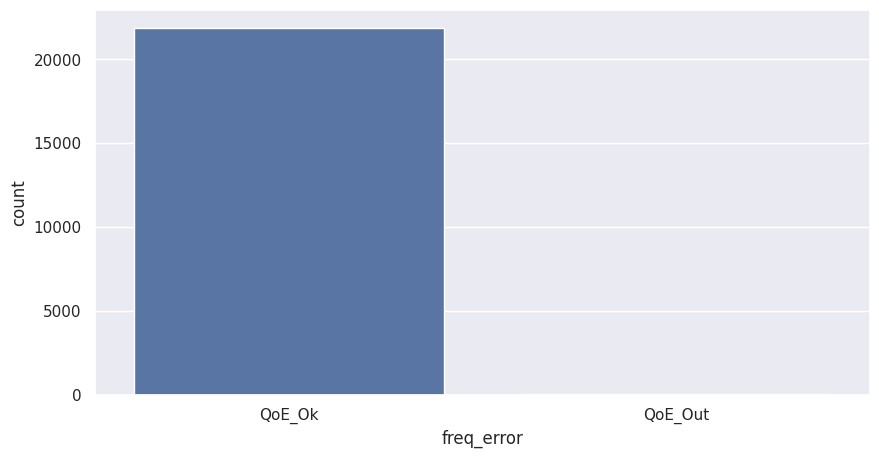

In [62]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n_train,x='freq_error')

# Limpieza de Outliers 📤

In [63]:
#limpieza de outliers en mediciones de voltaje
#dichos datos atipicos se pueden eliminar para efectos de analisis, por conocimiento del negocio se toma dicha decision 

frj1n_train['vll_avg'].quantile([0.1,0.5,0.9,0.95,0.99])

0.10    13259.419400
0.50    13557.070285
0.90    13835.928900
0.95    13888.560250
0.99    13990.810460
Name: vll_avg, dtype: float64

In [64]:
frj1n_10 = frj1n_train[frj1n_train['vll_avg']>frj1n_train['vll_avg'].quantile(0.1)].copy()
frj1n_99 = frj1n_10[frj1n_10['vll_avg']<frj1n_10['vll_avg'].quantile(0.99)].copy()

<Axes: xlabel='vll_avg', ylabel='Count'>

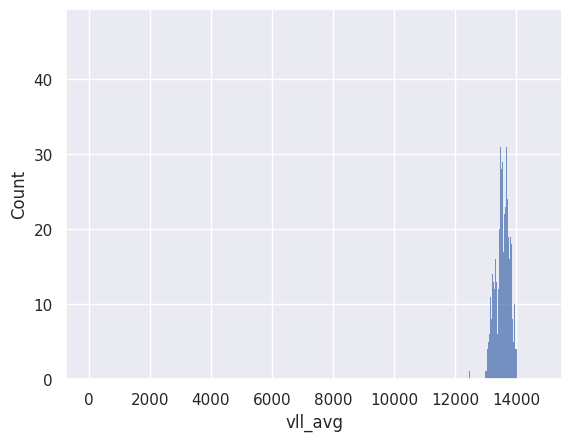

In [65]:
#Graficos Histograma para evaluar distribucion antes y despues de la limpieza
sns.histplot(data=frj1n_train,x='vll_avg', binwidth=0.7)

<Axes: xlabel='vll_avg', ylabel='Count'>

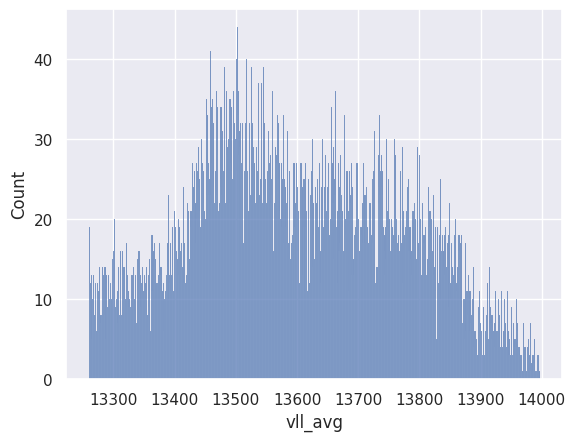

In [66]:
sns.histplot(data=frj1n_99,x='vll_avg', binwidth=0.7)

In [67]:
frj1n_99.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,Switch
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000
mean,13560.563363,13646.085929,13587.951138,13598.200174,0.418667,31.974073,28.793219,28.262401,29.676564,685.960026,121.570102,697.432198,60.001090,0.007829
std,177.171671,175.825240,169.394426,173.744929,0.099976,3.900478,3.596967,3.481048,3.657581,82.172441,40.136442,85.873560,0.007436,0.088138
min,13144.606000,13277.822000,13238.346000,13259.425000,0.121956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.878582,0.000000
25%,13427.201750,13513.537000,13460.249233,13467.271250,0.350980,32.156620,29.076407,28.351915,29.871105,700.130188,134.421852,713.341614,59.996971,0.000000
50%,13545.699000,13633.640000,13574.185785,13584.069500,0.406203,33.145767,29.954344,29.296081,30.802096,713.482941,139.871338,727.247681,60.000591,0.000000
75%,13699.829000,13785.276500,13722.148000,13735.656830,0.474316,33.912554,30.616584,30.045553,31.525524,723.784759,143.704312,737.898407,60.004486,0.000000
max,13976.306000,14053.336000,13996.548000,13995.971000,2.379739,36.312805,32.600735,32.254997,33.674641,760.718201,170.949509,777.091919,60.060234,1.000000


In [68]:
#limpieza de outliers en mediciones de corriente

frj1n_train['i_avg'].quantile([0.1,0.5,0.9,0.95,0.99])

0.10    25.134781
0.50    30.905147
0.90    32.415775
0.95    32.781459
0.99    33.343109
Name: i_avg, dtype: float64

In [69]:
#frj1n_10 = frj1n[frj1n['i_avg']>frj1n['i_avg'].quantile(0.1)].copy()
#frj1n_99 = frj1n_10[frj1n_10['i_avg']<frj1n_10['i_avg'].quantile(0.99)].copy()


In [70]:
#frj1n_ia = frj1n[frj1n['i_a']>frj1n['i_a'].quantile(0.1)].copy()
#frj1n_99 = frj1n_ia[frj1n_ia['i_a']<frj1n_ia['i_a'].quantile(0.99)].copy()

In [71]:
#frj1n_ib = frj1n[frj1n['i_b']>frj1n['i_b'].quantile(0.1)].copy()
#frj1n_99 = frj1n_ib[frj1n_ib['i_b']<frj1n_ib['i_b'].quantile(0.99)].copy()

In [72]:
#frj1n_ic = frj1n[frj1n['i_c']>frj1n['i_c'].quantile(0.1)].copy()
#frj1n_99 = frj1n_ic[frj1n_ic['i_c']<frj1n_ic['i_c'].quantile(0.99)].copy()

In [73]:
#limpieza de outliers en mediciones de potencia
frj1n_train['kw_tot'].quantile([0.1,0.5,0.9,0.95,0.99])

0.10    584.908758
0.50    714.659729
0.90    733.014361
0.95    737.677295
0.99    745.581810
Name: kw_tot, dtype: float64

In [74]:
frj1n_kw = frj1n_train[frj1n_train['kw_tot']>frj1n_train['kw_tot'].quantile(0.1)].copy()
frj1n_99 = frj1n_kw[frj1n_kw['kw_tot']<frj1n_kw['kw_tot'].quantile(0.99)].copy()

In [75]:
frj1n_kvar = frj1n_train[frj1n_train['kvar_tot']>frj1n_train['kvar_tot'].quantile(0.1)].copy()
frj1n_99 = frj1n_kvar[frj1n_kvar['kw_tot']<frj1n_kvar['kw_tot'].quantile(0.99)].copy()

In [76]:
frj1n_kva = frj1n_train[frj1n_train['kva_tot']>frj1n_train['kva_tot'].quantile(0.1)].copy()
frj1n_99 = frj1n_kva[frj1n_kva['kw_tot']<frj1n_kva['kw_tot'].quantile(0.99)].copy()

In [77]:
frj1n_unbal = frj1n_train[frj1n_train['v_unbal']>frj1n_train['v_unbal'].quantile(0.1)].copy()
frj1n_99 = frj1n_unbal[frj1n_unbal['v_unbal']<frj1n_unbal['v_unbal'].quantile(0.99)].copy()

In [78]:
frj1n_99.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,Switch
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19538.000000,19542.000000
mean,13518.448932,13604.682156,13547.221324,13556.784187,0.437097,32.324807,29.111561,28.577299,30.004556,690.997464,125.269534,702.925318,60.000987,0.009364
std,241.027079,241.496407,234.094089,238.589700,0.090062,4.079431,3.735195,3.638423,3.815801,85.034345,37.373379,88.304773,0.007320,0.096318
min,5067.736816,5123.140625,5104.349121,5098.407715,0.306032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.878582,0.000000
25%,13379.372000,13466.595500,13417.874982,13422.493983,0.370041,32.363003,29.266348,28.521540,30.057683,703.151016,135.872528,716.495148,59.996906,0.000000
50%,13519.618340,13610.539625,13549.171500,13559.837500,0.420545,33.347803,30.138816,29.516742,31.005731,716.105773,140.484352,729.818756,60.000477,0.000000
75%,13685.544750,13773.070250,13708.696750,13722.735250,0.486113,34.177532,30.823561,30.293576,31.760873,725.878052,144.187256,740.063248,60.004387,0.000000
max,14753.377000,14798.309570,14727.437500,14759.702000,1.046858,37.106956,33.099033,32.925125,34.364212,760.718201,170.409882,777.091919,60.060234,1.000000


# Transformaciones Variables Numericas 💻

## Min Max Scaler

### Feature: vll_avg

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
mm_scaler = MinMaxScaler()

In [81]:
col_name = 'vll_avg'
trans_col_name = 'vll_avg_mm'
frj1n_train[trans_col_name] = mm_scaler.fit_transform(frj1n_train[[col_name]])
frj1n_99[trans_col_name] = mm_scaler.fit_transform(frj1n_99[[col_name]])

<Axes: xlabel='vll_avg_mm', ylabel='Count'>

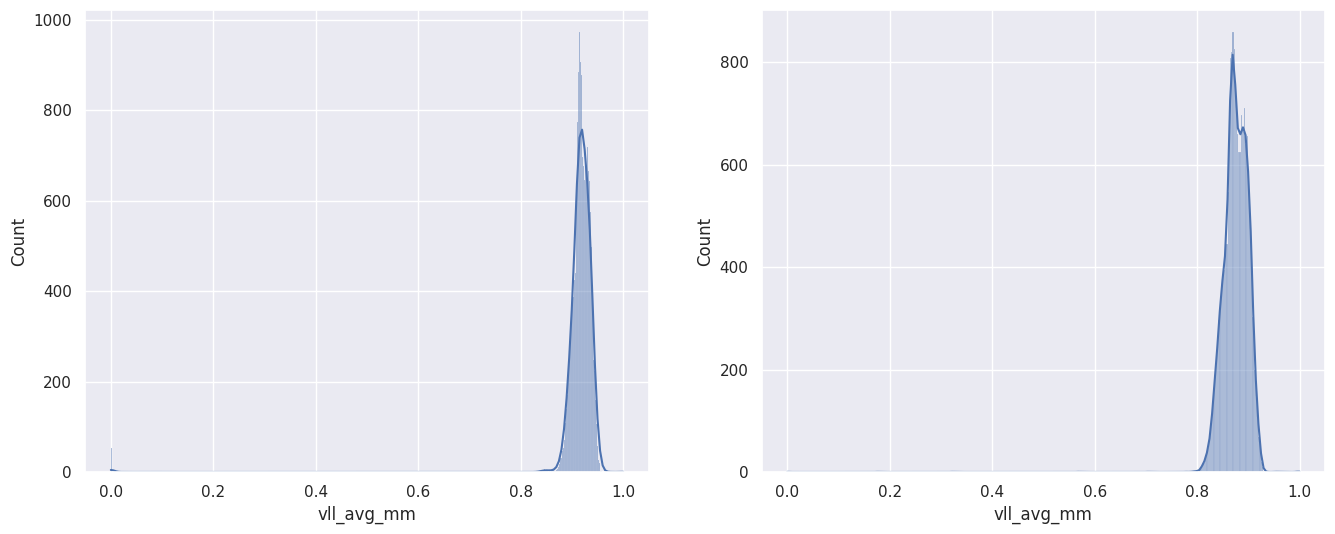

In [82]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=frj1n_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')

In [83]:
#fig, axes = plt.subplots(nrows=2, figsize=(6,8))
#sns.histplot(data=frj1n, x=col_name, ax=axes[0],kde=True)
#axes[0].set_title('Original data')
#sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1],kde=True)
#axes[1].set_title('Transformed data')
#plt.tight_layout()



> Se utiliza el condificador MinMax Scaler ya que los datos se encuentran dentro de un rango de operacion definidos con una distribucion que se asemeja a la normal con un sesgo hacia la izquierda, es decir bajo voltaje, que podria ser provocado por la red electrica del lado del distribuidor



## Standar Scaler o Normalizacion

### Feature: vll_avg

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
sd_scaler = StandardScaler( )
sd_scaler2 = StandardScaler(with_mean=False, with_std=True)

In [86]:
col_name = 'vll_avg'
trans_col_name = 'vll_avg_sd'
frj1n_train[trans_col_name]= sd_scaler.fit_transform(frj1n_train[['vll_avg']])
frj1n_99[trans_col_name]= sd_scaler.fit_transform(frj1n_99[['vll_avg']])
frj1n_99[f'{trans_col_name}_2']= sd_scaler2.fit_transform(frj1n_99[['vll_avg']])

<Axes: xlabel='vll_avg_sd_2', ylabel='Count'>

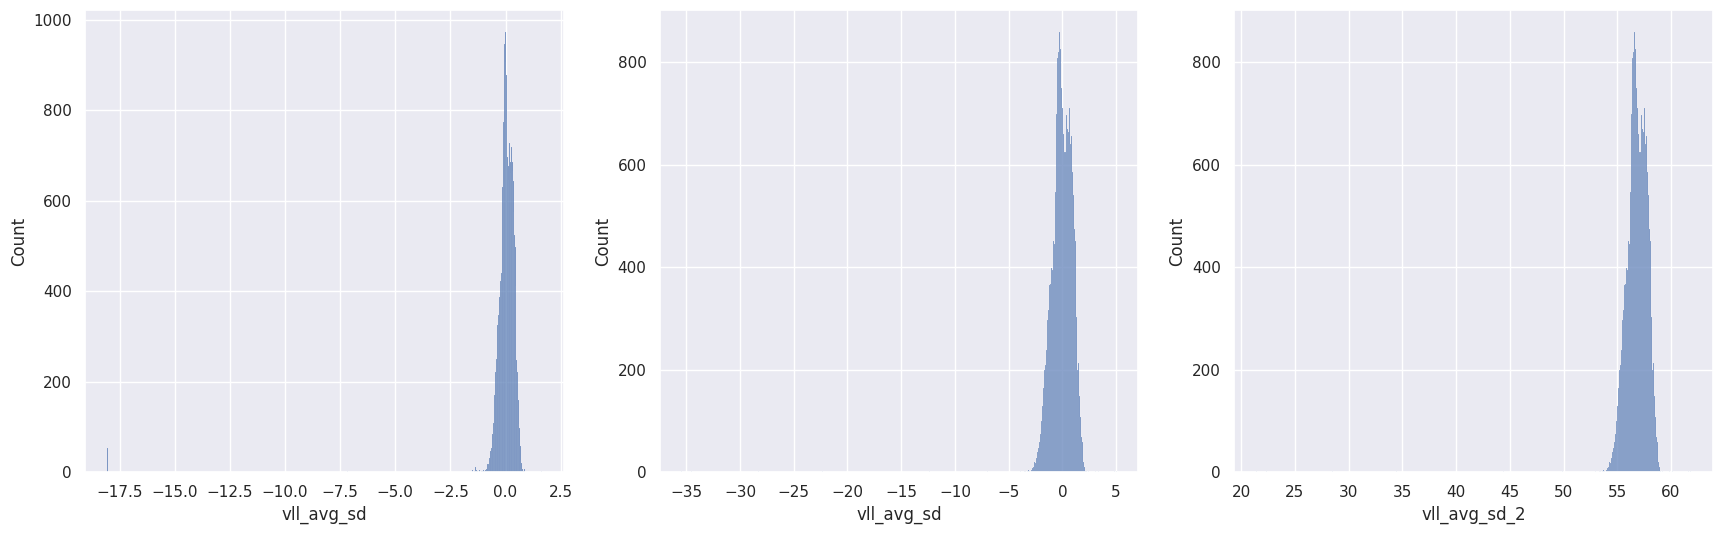

In [87]:
fig, axes = plt.subplots(ncols=3, figsize=(21,6))
sns.histplot(data=frj1n_train, x=trans_col_name, ax=axes[0])
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1])
sns.histplot(data=frj1n_99, x=f'{trans_col_name}_2', ax=axes[2])
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')



> Los datos se encuentran centrados a cero, y escalados de acuerdo a la varianza. Este tipo de normalizacion se ve afectada por los datos atipicos en el set de datos, y a pesar de que fueron eliminados antes de realizar la codificacion vemos ue ahora tenemos valores negativos en los predictores por lo que se considera mejor utilizar el escaldo MinMax ya que el rango nos queda entre 0 y 1.



## Robust Scaler

In [88]:
from sklearn.preprocessing import RobustScaler

In [89]:
rb_scaler = RobustScaler ( )

In [90]:
frj1n_99.describe()


,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,Switch,vll_avg_mm,vll_avg_sd,vll_avg_sd_2
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19538.000000,19542.000000,19542.000000,1.954200e+04,19542.000000
mean,13518.448932,13604.682156,13547.221324,13556.784187,0.437097,32.324807,29.111561,28.577299,30.004556,690.997464,125.269534,702.925318,60.000987,0.009364,0.875491,-2.232490e-15,56.821946
std,241.027079,241.496407,234.094089,238.589700,0.090062,4.079431,3.735195,3.638423,3.815801,85.034345,37.373379,88.304773,0.007320,0.096318,0.024695,1.000026e+00,1.000026
min,5067.736816,5123.140625,5104.349121,5098.407715,0.306032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.878582,0.000000,0.000000,-3.545246e+01,21.369481
25%,13379.372000,13466.595500,13417.874982,13422.493983,0.370041,32.363003,29.266348,28.521540,30.057683,703.151016,135.872528,716.495148,59.996906,0.000000,0.861591,-5.628644e-01,56.259082
50%,13519.618340,13610.539625,13549.171500,13559.837500,0.420545,33.347803,30.138816,29.516742,31.005731,716.105773,140.484352,729.818756,60.000477,0.000000,0.875807,1.279766e-02,56.834744
75%,13685.544750,13773.070250,13708.696750,13722.735250,0.486113,34.177532,30.823561,30.293576,31.760873,725.878052,144.187256,740.063248,60.004387,0.000000,0.892668,6.955678e-01,57.517514
max,14753.377000,14798.309570,14727.437500,14759.702000,1.046858,37.106956,33.099033,32.925125,34.364212,760.718201,170.409882,777.091919,60.060234,1.000000,1.000000,5.041913e+00,61.863859


### Feature: i_avg

In [91]:
col_name = 'i_avg'
trans_col_name = 'i_avg_rb'
frj1n_train[trans_col_name]= rb_scaler.fit_transform(frj1n_train[[col_name]])
frj1n_99[trans_col_name]= rb_scaler.fit_transform(frj1n_99[[col_name]])

### Feature: i_a

In [92]:
col_name = 'i_a'
trans_col_name = 'i_a_rb'
frj1n_train[trans_col_name]= rb_scaler.fit_transform(frj1n_train[[col_name]])
frj1n_99[trans_col_name]= rb_scaler.fit_transform(frj1n_99[[col_name]])

### Feature: i_b

In [93]:
col_name = 'i_b'
trans_col_name = 'i_b_rb'
frj1n_train[trans_col_name]= rb_scaler.fit_transform(frj1n_train[[col_name]])
frj1n_99[trans_col_name]= rb_scaler.fit_transform(frj1n_99[[col_name]])

### Feature: i_c

In [94]:
col_name = 'i_c'
trans_col_name = 'i_c_rb'
frj1n_train[trans_col_name]= rb_scaler.fit_transform(frj1n_train[[col_name]])
frj1n_99[trans_col_name]= rb_scaler.fit_transform(frj1n_99[[col_name]])

In [95]:
frj1n_99.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,...,kva_tot,freq,Switch,vll_avg_mm,vll_avg_sd,vll_avg_sd_2,i_avg_rb,i_a_rb,i_b_rb,i_c_rb
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,...,19542.000000,19538.000000,19542.000000,19542.000000,1.954200e+04,19542.000000,19542.000000,19542.000000,1.954200e+04,1.954200e+04
mean,13518.448932,13604.682156,13547.221324,13556.784187,0.437097,32.324807,29.111561,28.577299,30.004556,690.997464,...,702.925318,60.000987,0.009364,0.875491,-2.232490e-15,56.821946,-0.587824,-0.563780,-6.596751e-01,-5.301488e-01
std,241.027079,241.496407,234.094089,238.589700,0.090062,4.079431,3.735195,3.638423,3.815801,85.034345,...,88.304773,0.007320,0.096318,0.024695,1.000026e+00,1.000026,2.240385,2.248203,2.398640e+00,2.053245e+00
min,5067.736816,5123.140625,5104.349121,5098.407715,0.306032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,59.878582,0.000000,0.000000,-3.545246e+01,21.369481,-18.204511,-18.378209,-1.935432e+01,-1.665697e+01
25%,13379.372000,13466.595500,13417.874982,13422.493983,0.370041,32.363003,29.266348,28.521540,30.057683,703.151016,...,716.495148,59.996906,0.000000,0.861591,-5.628644e-01,56.259082,-0.556631,-0.542730,-5.602757e-01,-5.616147e-01
50%,13519.618340,13610.539625,13549.171500,13559.837500,0.420545,33.347803,30.138816,29.516742,31.005731,716.105773,...,729.818756,60.000477,0.000000,0.875807,1.279766e-02,56.834744,0.000000,0.000000,1.140730e-15,-1.002440e-15
75%,13685.544750,13773.070250,13708.696750,13722.735250,0.486113,34.177532,30.823561,30.293576,31.760873,725.878052,...,740.063248,60.004387,0.000000,0.892668,6.955678e-01,57.517514,0.443369,0.457270,4.397243e-01,4.383853e-01
max,14753.377000,14798.309570,14727.437500,14759.702000,1.046858,37.106956,33.099033,32.925125,34.364212,760.718201,...,777.091919,60.060234,1.000000,1.000000,5.041913e+00,61.863859,1.971877,2.071696,1.900970e+00,1.923428e+00


<Axes: xlabel='i_c_rb', ylabel='Count'>

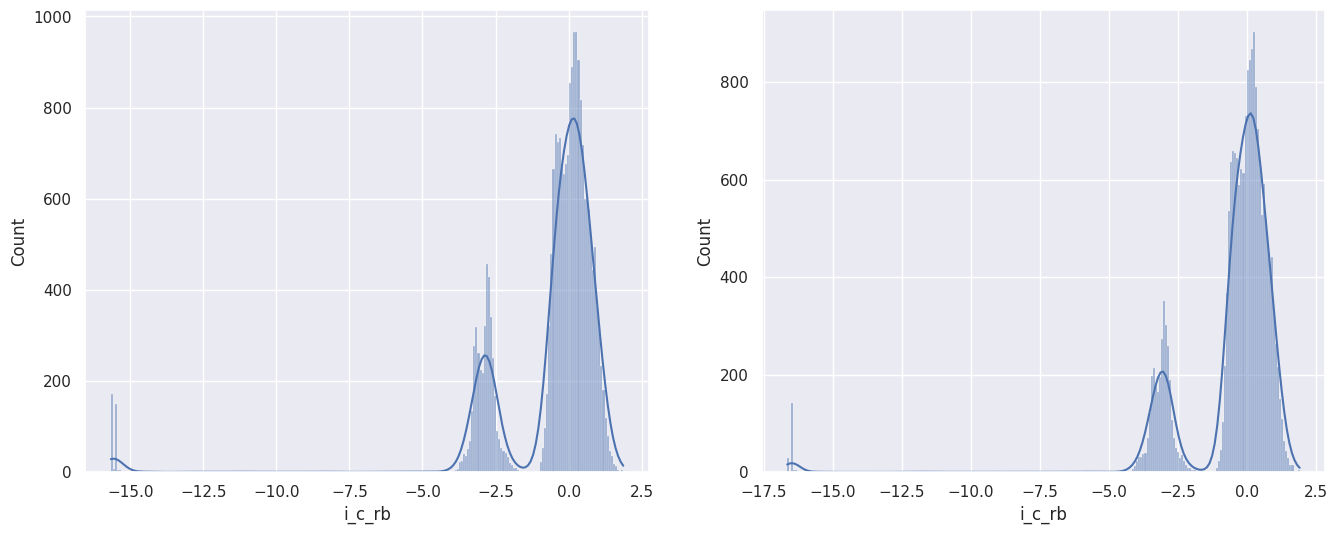

In [96]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=frj1n_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')



> Derivado de que esta codificacion es mas resistente a los valores atipicos al centrar entre los cuartiles 25% y 75%, se utiliza en los valores de corriente que se observaron con mucha influencia de los mismos y cuyo valor real no se mantiene entre rangos sino que puede subir o bajar en funcion de la carga que estemos utilizando.  Se observa una distribucion que asemeja a la normal, con dos modas que fueron producto de una subita disminucion de la carga derivado de una intervencion para quitar carga de Aires Acondicionados en el Centro Tecnico.  La distribucion esta centrada estre ambas y escalada de acuerdo al rango de cuartiles. 

Se realizó la misma codificacion con datos sin outliers encontrando un resultado similar pero con un escalamiento mas centrado en cero.

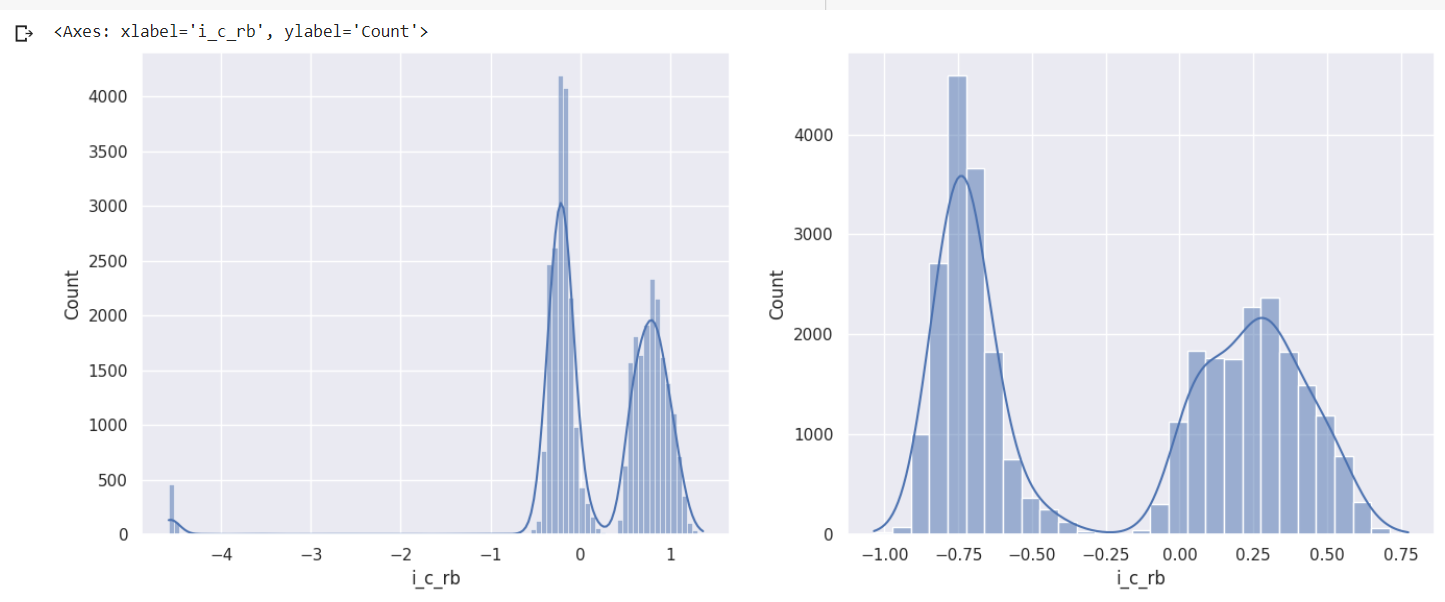



## Transformacion Box Cox / Yeo Johnson

In [97]:
frj1n_99.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,...,kva_tot,freq,Switch,vll_avg_mm,vll_avg_sd,vll_avg_sd_2,i_avg_rb,i_a_rb,i_b_rb,i_c_rb
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,...,19542.000000,19538.000000,19542.000000,19542.000000,1.954200e+04,19542.000000,19542.000000,19542.000000,1.954200e+04,1.954200e+04
mean,13518.448932,13604.682156,13547.221324,13556.784187,0.437097,32.324807,29.111561,28.577299,30.004556,690.997464,...,702.925318,60.000987,0.009364,0.875491,-2.232490e-15,56.821946,-0.587824,-0.563780,-6.596751e-01,-5.301488e-01
std,241.027079,241.496407,234.094089,238.589700,0.090062,4.079431,3.735195,3.638423,3.815801,85.034345,...,88.304773,0.007320,0.096318,0.024695,1.000026e+00,1.000026,2.240385,2.248203,2.398640e+00,2.053245e+00
min,5067.736816,5123.140625,5104.349121,5098.407715,0.306032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,59.878582,0.000000,0.000000,-3.545246e+01,21.369481,-18.204511,-18.378209,-1.935432e+01,-1.665697e+01
25%,13379.372000,13466.595500,13417.874982,13422.493983,0.370041,32.363003,29.266348,28.521540,30.057683,703.151016,...,716.495148,59.996906,0.000000,0.861591,-5.628644e-01,56.259082,-0.556631,-0.542730,-5.602757e-01,-5.616147e-01
50%,13519.618340,13610.539625,13549.171500,13559.837500,0.420545,33.347803,30.138816,29.516742,31.005731,716.105773,...,729.818756,60.000477,0.000000,0.875807,1.279766e-02,56.834744,0.000000,0.000000,1.140730e-15,-1.002440e-15
75%,13685.544750,13773.070250,13708.696750,13722.735250,0.486113,34.177532,30.823561,30.293576,31.760873,725.878052,...,740.063248,60.004387,0.000000,0.892668,6.955678e-01,57.517514,0.443369,0.457270,4.397243e-01,4.383853e-01
max,14753.377000,14798.309570,14727.437500,14759.702000,1.046858,37.106956,33.099033,32.925125,34.364212,760.718201,...,777.091919,60.060234,1.000000,1.000000,5.041913e+00,61.863859,1.971877,2.071696,1.900970e+00,1.923428e+00


In [98]:
from sklearn.preprocessing import PowerTransformer

In [99]:
bx_transformer = PowerTransformer(method='box-cox')
bx1_transformer = PowerTransformer(method='yeo-johnson')

### Feature: kw_tot

In [100]:
col_name1 = 'kw_tot'
trans_col_name1 = 'kw_tot_bx'
#frj1n[trans_col_name]= bx_transformer.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name1]= bx1_transformer.fit_transform(frj1n_99[[col_name1]])

### Feature: kvar_tot

In [101]:
col_name2 = 'kvar_tot'
trans_col_name2 = 'kvar_tot_bx'
#frj1n[trans_col_name]= bx1_transformer.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name2]= bx1_transformer.fit_transform(frj1n_99[[col_name2]])


### Feature: kva_tot

In [102]:
col_name3 = 'kva_tot'
trans_col_name3 = 'kva_tot_bx'
#frj1n[trans_col_name]= bx1_transformer.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name3]= bx1_transformer.fit_transform(frj1n_99[[col_name3]])

<Axes: xlabel='i_c_rb', ylabel='Count'>

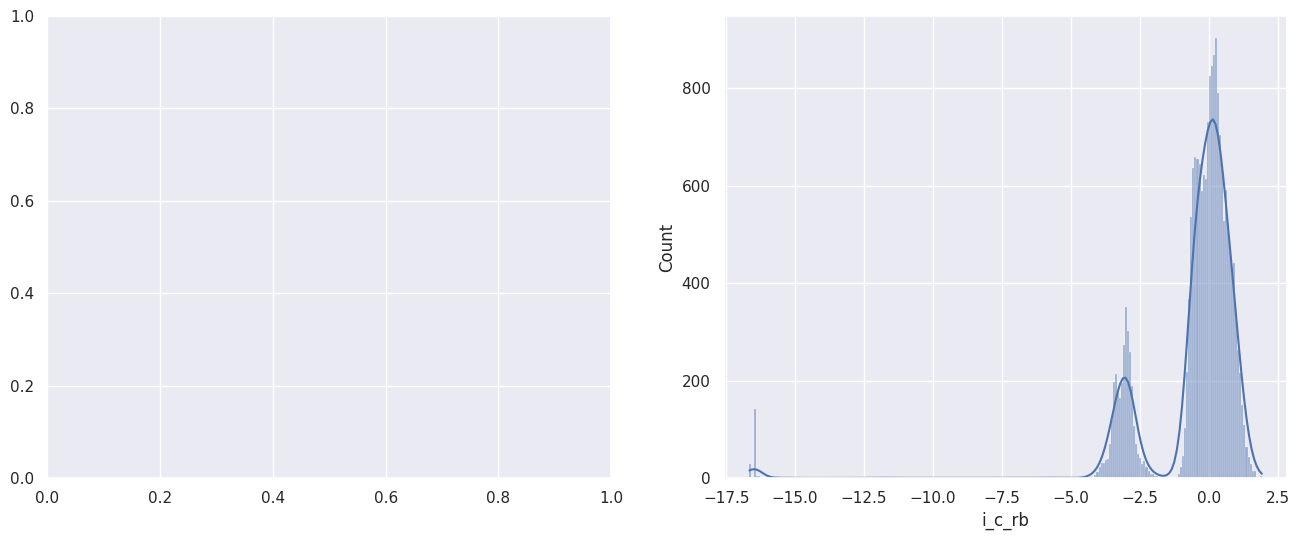

In [103]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
#sns.histplot(data=frj1n, x=col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data') 
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')

# No se grafica el set de datos original porque las variables originales tiene valores negativos



> La potencia y la corriente tienen un comportamiento muy similar ya que son directamente proporcionales P = 1.73*V*I (P = Potencia,  V = voltaje, I = Corriente, 1.73 = Constante para sistemas trifasicos, que es igual a la raiz de 3).  Se utilizó la transformacion de potencia para tener la disponibilidad de aplicar la misma transformacion al triangulo de potencias, con la idea de aplicar el metodo Box Cox a las potencias Activa (kW) y Aparente (kVA) y el metodo Yeo Johnson a la potencia Reactiva (kVAR) ya que puede tener valores negativos.  Al final de dejaron todas las transfomaciones con el segundo metodos por un tema que aun debemos de corregir respecto a valores negativos indicados para la potencia activa. 



# Transformacion Variables Categoricas 💻

In [104]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.4 MB/s eta 0:00:00


In [105]:
col_ab = 'vclasif_ab'
col_bc = 'vclasif_bc'
col_ca = 'vclasif_ca'

In [106]:
frj1n_99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 3 to 21932
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          19542 non-null  datetime64[ns]
 1   vll_ab        19542 non-null  float64       
 2   vll_bc        19542 non-null  float64       
 3   vll_ca        19542 non-null  float64       
 4   vll_avg       19542 non-null  float64       
 5   v_unbal       19542 non-null  float64       
 6   i_a           19542 non-null  float64       
 7   i_b           19542 non-null  float64       
 8   i_c           19542 non-null  float64       
 9   i_avg         19542 non-null  float64       
 10  kw_tot        19542 non-null  float64       
 11  kvar_tot      19542 non-null  float64       
 12  kva_tot       19542 non-null  float64       
 13  freq          19538 non-null  float64       
 14  Switch        19542 non-null  int64         
 15  vclasif_ab    19542 non-null  object

## One Hot Enconder

In [107]:
from category_encoders import OneHotEncoder

In [108]:
onehot_enc_ab = OneHotEncoder(use_cat_names=True) #, handle_unknown='ignore'   )

### Feature: vclasif_ab

In [109]:
#onehot_enc_ab.fit_transform(frj1n[[col_ab]])
encoder_ab = pd.DataFrame(onehot_enc_ab.fit_transform(frj1n_99[[col_ab]])) #.toarray())

In [110]:
onehot_enc_ab.mapping[0]['mapping'] #   mapping[0]['mapping']

,vclasif_ab_Voltaje Normal,vclasif_ab_Bajo Voltaje,vclasif_ab_Alto Voltaje
1,1,0,0
2,0,1,0
3,0,0,1
-1,0,0,0
-2,0,0,0


In [111]:
frj1n_99 = frj1n_99.join(encoder_ab)

### Feature: vclasif_bc

In [112]:
onehot_enc_bc = OneHotEncoder(use_cat_names=True) #, handle_unknown='ignore'  )

In [113]:
encoder_bc = pd.DataFrame(onehot_enc_bc.fit_transform(frj1n_99[[col_bc]])) #.toarray())
#onehot_enc_bc.fit_transform(frj1n[[col_bc]])

In [114]:
onehot_enc_bc.mapping[0]['mapping'] #   mapping[0]['mapping']

,vclasif_bc_Voltaje Normal,vclasif_bc_Bajo Voltaje,vclasif_bc_Alto Voltaje
1,1,0,0
2,0,1,0
3,0,0,1
-1,0,0,0
-2,0,0,0


In [115]:
frj1n_99 = frj1n_99.join(encoder_bc)

### Feature: vclasif_ca

In [116]:
onehot_enc_ca = OneHotEncoder(use_cat_names=True) #, handle_unknown='ignore'  )

In [117]:
#onehot_enc_ca.fit_transform(frj1n[[col_ca]])
encoder_ca = pd.DataFrame(onehot_enc_ca.fit_transform(frj1n_99[[col_ca]])) #.toarray())

In [118]:
onehot_enc_ca.mapping[0]['mapping'] #   mapping[0]['mapping']

,vclasif_ca_Voltaje Normal,vclasif_ca_Bajo Voltaje,vclasif_ca_Alto Voltaje
1,1,0,0
2,0,1,0
3,0,0,1
-1,0,0,0
-2,0,0,0


In [119]:
frj1n_99 = frj1n_99.join(encoder_ca)

In [120]:
frj1n_99.shape

(19542, 39)

In [121]:
frj1n_99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 3 to 21932
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       19542 non-null  datetime64[ns]
 1   vll_ab                     19542 non-null  float64       
 2   vll_bc                     19542 non-null  float64       
 3   vll_ca                     19542 non-null  float64       
 4   vll_avg                    19542 non-null  float64       
 5   v_unbal                    19542 non-null  float64       
 6   i_a                        19542 non-null  float64       
 7   i_b                        19542 non-null  float64       
 8   i_c                        19542 non-null  float64       
 9   i_avg                      19542 non-null  float64       
 10  kw_tot                     19542 non-null  float64       
 11  kvar_tot                   19542 non-null  float64       
 12  kva_



> Las variables categoricas que representan el comportamiento del voltaje de suministro, en un rango de Alto, Normal y Bajo se utilizaron para transformarlas en caracteristicas numericas que solo nos sirven para entrenamiento del modelo.  Como la cardinalidad de cada variable es de 3 categorias se tendran al final nueve variables nuevas.



## Binary Encoder

Para variables que son categoricas y binarias

In [122]:
from category_encoders import BinaryEncoder

In [123]:
bin_encoder = BinaryEncoder()

In [124]:
col_k = "kvar_warn"
col_f = "freq_error"

### Feature: kvar_warn

In [125]:
kvarwarning = bin_encoder.fit_transform(frj1n_99[col_k])
kvarwarning

,kvar_warn_0,kvar_warn_1
3,0,1
4,0,1
6,0,1
8,0,1
9,0,1
...,...,...
21893,0,1
21894,0,1
21901,0,1
21931,0,1


In [126]:
frj1n_99 = frj1n_99.join(kvarwarning)

### Feature: freq_error

In [127]:
frequency = bin_encoder.fit_transform(frj1n_99[col_f])
frequency

,freq_error_0,freq_error_1
3,0,1
4,0,1
6,0,1
8,0,1
9,0,1
...,...,...
21893,0,1
21894,0,1
21901,0,1
21931,0,1


In [128]:
frj1n_99 = frj1n_99.join(frequency)

In [129]:
frj1n_99.shape

(19542, 43)

In [130]:
frj1n_99

,date,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,...,vclasif_bc_Voltaje Normal,vclasif_bc_Bajo Voltaje,vclasif_bc_Alto Voltaje,vclasif_ca_Voltaje Normal,vclasif_ca_Bajo Voltaje,vclasif_ca_Alto Voltaje,kvar_warn_0,kvar_warn_1,freq_error_0,freq_error_1
3,2022-12-01 11:30:00,13517.328,13586.898,13539.01900,13547.75900,0.328185,26.215769,23.377346,23.132750,24.241957,...,1,0,0,1,0,0,0,1,0,1
4,2022-12-01 11:15:00,13527.545,13599.054,13550.37300,13558.99100,0.325932,26.574001,23.642118,23.445925,24.554014,...,1,0,0,1,0,0,0,1,0,1
6,2022-12-01 10:45:00,13561.952,13630.493,13585.39800,13592.61500,0.317956,26.077366,23.239059,22.997168,24.104530,...,1,0,0,1,0,0,0,1,0,1
8,2022-12-01 10:15:00,13521.686,13586.795,13543.39700,13550.62207,0.312951,26.728487,24.028473,23.636028,24.797642,...,1,0,0,1,0,0,0,1,0,1
9,2022-12-01 10:00:00,13537.416,13599.194,13562.14100,13566.25700,0.331404,26.516167,23.588799,23.372272,24.492405,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,2022-04-17 11:00:00,13872.873,13978.702,13904.58000,13918.71000,0.467038,31.855549,29.059206,28.378527,29.764421,...,1,0,0,1,0,0,0,1,0,1
21894,2022-04-17 10:45:00,13891.187,13974.712,13912.98900,13926.29900,0.321755,31.645304,28.725571,28.087793,29.486216,...,1,0,0,1,0,0,0,1,0,1
21901,2022-04-17 09:00:00,13953.583,14023.632,13990.28125,13989.16100,0.318742,31.718657,28.529686,28.006222,29.418190,...,1,0,0,1,0,0,0,1,0,1
21931,2022-04-17 01:30:00,13858.353,13957.397,13916.41400,13910.70900,0.328898,32.471920,29.166483,28.850023,30.162807,...,1,0,0,1,0,0,0,1,0,1


In [131]:
frj1n_99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 3 to 21932
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       19542 non-null  datetime64[ns]
 1   vll_ab                     19542 non-null  float64       
 2   vll_bc                     19542 non-null  float64       
 3   vll_ca                     19542 non-null  float64       
 4   vll_avg                    19542 non-null  float64       
 5   v_unbal                    19542 non-null  float64       
 6   i_a                        19542 non-null  float64       
 7   i_b                        19542 non-null  float64       
 8   i_c                        19542 non-null  float64       
 9   i_avg                      19542 non-null  float64       
 10  kw_tot                     19542 non-null  float64       
 11  kvar_tot                   19542 non-null  float64       
 12  kva_



> Las variables predictoras de frecuencia (freq_error) y Potencia reactiva (kvar_warn) unicamente tienen dos categorias: cumple o no cumple una determinada condicion propia de cada una. Por tal motivo se utilizó la codificacion Binaria para ambas para evaluar en en entrenamiento del modelo.



## Limpieza de Dataset 

In [132]:
#se elimnan variables ya codificadas
df_frj = pd.DataFrame(data=frj1n_99)
del df_frj['date']
del df_frj['vll_ab']
del df_frj['vll_bc']
del df_frj['vll_ca']
del df_frj['vll_avg']
del df_frj['kvar_warn']
del df_frj['freq_error']
del df_frj['i_avg']
del df_frj['kw_tot']
del df_frj['freq']
del df_frj['i_a']
del df_frj['i_b']
del df_frj['i_c']
del df_frj['kvar_tot']
del df_frj['kva_tot']
del df_frj['v_unbal']
del df_frj['vclasif_ab']
del df_frj['vclasif_bc']
del df_frj['vclasif_ca']
del df_frj['vll_avg_sd_2']



In [133]:
df_frj

,Switch,vll_avg_mm,vll_avg_sd,i_avg_rb,i_a_rb,i_b_rb,i_c_rb,kw_tot_bx,kvar_tot_bx,kva_tot_bx,...,vclasif_bc_Voltaje Normal,vclasif_bc_Bajo Voltaje,vclasif_bc_Alto Voltaje,vclasif_ca_Voltaje Normal,vclasif_ca_Bajo Voltaje,vclasif_ca_Alto Voltaje,kvar_warn_0,kvar_warn_1,freq_error_0,freq_error_1
3,0,0.874557,-0.037828,-3.971240,-3.930514,-4.342031,-3.602632,-2.233736,-2.139437,-2.213524,...,1,0,0,1,0,0,0,1,0,1
4,0,0.875719,0.009250,-3.788021,-3.733090,-4.172002,-3.425900,-2.161677,-2.133113,-2.155608,...,1,0,0,1,0,0,0,1,0,1
6,0,0.879200,0.150181,-4.051928,-4.006789,-4.430835,-3.679144,-2.245763,-2.140216,-2.223188,...,1,0,0,1,0,0,0,1,0,1
8,0,0.874853,-0.025828,-3.644979,-3.647952,-3.923895,-3.318621,-2.107422,-2.130101,-2.112123,...,1,0,0,1,0,0,0,1,0,1
9,0,0.876472,0.039704,-3.824194,-3.764963,-4.206242,-3.467464,-2.170734,-2.137682,-2.164307,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,0,0.912952,1.516977,-0.728815,-0.822392,-0.693296,-0.642320,-0.032161,0.211343,-0.044036,...,1,0,0,1,0,0,0,1,0,1
21894,0,0.913738,1.548785,-0.892159,-0.938259,-0.907548,-0.806388,-0.169532,-0.072314,-0.198699,...,1,0,0,1,0,0,0,1,0,1
21901,0,0.920245,1.812265,-0.932099,-0.897834,-1.033340,-0.852421,-0.153864,0.210723,-0.163846,...,1,0,0,1,0,0,0,1,0,1
21931,0,0.912124,1.483442,-0.494909,-0.482705,-0.624406,-0.376244,0.191266,0.419188,0.189299,...,1,0,0,1,0,0,0,1,0,1


In [134]:
df_frj.info() # Dataset solo con varibles transformadas y escaladas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 3 to 21932
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Switch                     19542 non-null  int64  
 1   vll_avg_mm                 19542 non-null  float64
 2   vll_avg_sd                 19542 non-null  float64
 3   i_avg_rb                   19542 non-null  float64
 4   i_a_rb                     19542 non-null  float64
 5   i_b_rb                     19542 non-null  float64
 6   i_c_rb                     19542 non-null  float64
 7   kw_tot_bx                  19542 non-null  float64
 8   kvar_tot_bx                19542 non-null  float64
 9   kva_tot_bx                 19542 non-null  float64
 10  vclasif_ab_Voltaje Normal  19542 non-null  int64  
 11  vclasif_ab_Bajo Voltaje    19542 non-null  int64  
 12  vclasif_ab_Alto Voltaje    19542 non-null  int64  
 13  vclasif_bc_Voltaje Normal  19542 non-null  int

# ALGORITMOS DE MODELADO 🚧

In [135]:
from sklearn import linear_model

In [136]:
# A CONTINUACION CODIGO EJEMPLO, MACHOTE

In [137]:
# DEBERÍAMOS REPETIR PROBAR CADA MODELO CON UN DF DISTINTO, CADA DF DISTINTO ESTARÍA USANDO UNA 
# TRANSOFRMACION DIFERENTE Y ASI PODREMOS COMPARAR EL RENDIMIENTO DE UN TIPO DE TRANSFORMACION CON OTRA
#model = linear_model.LinearRegression()
#model.fit(DF[['COLUMN0', 'COLUMN1', 'COLUMN2']],DF['RESPUESTA'])

In [138]:
#print(f'Coefficients: {model.coef_}')
#print(f'Intercept: {model.intercept_}')
#print(f'Negative sum of coaefficients:{np.sum(model.coef_*-1)}')

In [139]:
#print('Global mean: ',df_test['Rent'].mean())
#print(df_test.groupby('City').mean())